# Detection time comparisons

Use different methods to estimate the time-to-detection of Arctic climate change. We will ignore measurement error for now.

__Methods:__

- Weatherhead et al. (1998)
- Leroy et al. (2008)
- Naive Large-Ensemble method (intended to be analogous to the SNR methods of Weatherhead and Leroy)
- Large-Ensemble method (intended to be closer to the advanced statistical methods of Barnhart et al. (2016))

## Description of Methods

#### Weatherhead et al. (1998)

$$ n^* \approx \left[ \frac{3.3 \sigma_{\epsilon}}{|\omega_0|(1-\phi)} \right] ^{2/3} = \left[ \frac{3.3 \sigma_{N}}{|\omega_0|} \sqrt{\frac{1+\phi}{1 - \phi}} \right] ^{2/3}, $$

where $n^*$ is the number of years needed to dect a real trend of magnitude $|\omega_0|$ with probability $0.90$, $\phi$ is the lag-1 autocorrelation, $\sigma_{\epsilon}$ is the standard deviation of random noise, and $\sigma_{N}$ is the standard deviation of the climate variable after a linear trend is removed (the measured noise).

_This method uses is the first iteration of the signal-to-noise method, where time-to-detection is determined by estimating the uncertainty in a linear regression fit and the degree of autocorrelation is estimated entirely from the lag-1 autocorrelation.__

#### Leroy et al. (2008)

After ignoring measurement error, we have:  

$$ \Delta t = \left[ \frac{12s^2}{m_{est}^2} \sigma_{var}^2 \tau_{var} \right]^{1/3}, $$

where $\Delta t$ is the number of years needed to detect a real trend of magnitude $m_{est}$, $\tau_{var}$ is the correlation time for natural variability, and $\sigma_{var}$ is the standard deviation of natural variability. The meaning of $\tau_{var}$ is confusing, but it can be thought of as the number of timesteps until the correlation function reaches zero/the natural noise. This is complicated by correlation functions with different shapes and definitions of noise. Leroy et al. define the correlation time as the sum of the natural variability autocorrelation function over all lags $\mu$:

$$ \tau_{var} = dt \sum_{\mu=-\infty}^{\infty} Corr(var) $$

For the 95% confidence interval, the signal-to-noise ratio $s$ is taken to be $s=2$ (5% of possible scenarios lie outside of two standard deviations on either side of a normal distribution).

I will put confidence intervals on Leroy's $\Delta t$ by propagating an error in the forced response $\delta m_{est}$:  

$$ \delta \Delta t = \frac{\partial \Delta t}{\partial m_{est}} \delta m_{est} $$

$$ \frac{\partial \Delta t}{\partial m_{est}} = \frac{-2}{3m_{est}} \left[ \frac{12s^2}{m_{est}^2} \sigma_{var}^2 \tau_{var} \right]^{1/3} = \frac{-2}{3m_{est}} \Delta t $$

$$ \delta \Delta t = \frac{-2}{3m_{est}} \Delta t \delta m_{est} $$

We can rewrite this expression in terms of the fractional uncertainties of the forced response and the detection time:

$$ \frac{\delta \Delta t}{\Delta t} = \frac{2}{3} \left( \frac{\delta m_{est}}{m_{est}} \right), $$

so the fractional uncertainty in the forced response transfers to the detection time after applying a small scaling term. We now ask, what is our uncertainty in the forced response? A large ensemble shows uncertainty in a forced response, but there is also uncertainty in the forced response because it depends on the climate mean state when measurements begin, and uncertainty due to model physics (not considered here). Can we just calculate these terms and add them in quadrature:

$$ \delta m_{est}^2 = \delta m_{est,lens}^2 + \delta m_{est,mean-state}^2 + \delta m_{est,physics}^2 $$

I can estimate $\delta m_{est,lens}$ by sampling across ensemble members and $\delta m_{est,mean-state}$ by sampling the forced response across different start years. Are these values correlated? i.e. Are these estimates duplicative because the difference in mean-state at the start of the sampling period gives rise to the spread in the large-ensemble?

### Shaw time-to-detection values (this work)

This is just a modification of Leroy (2008) that allows the forced response and noise characteristics (variance and autocorrelation) to vary in time.

The fractional uncertainty in the detection time is equal to the fractional uncertainty in the forced response, multiplied by a scaling factor of $2/3$. This is easy to apply and think about, if the forced response is highly uncertain, most of that uncertainty will be passed along to the detection time. For climate processes and observational periods where $\delta m_{est}$ is large, the confidence bounds on the detection time will increase above $t_f - t_0$. In this case, we cannot reasonably argue the detection is guaranteed to occur, so we must amend our definition of $n$:


$$ n = min \left(\left[\frac{12s^2}{m_{est}(t_0,t_f)^2}\sigma_{var}(t_0,t_f)^2 \tau_{var}(t_0,t_f)\right]^{1/3}(1+f(t_0,t_f)^2)^{1/3}\left(1+\frac{2}{3}\frac{\delta m_{est}}{m_{est}}(t_0,t_f)\right) < t_f - t_0 \right) $$

#### Naive Large-Ensemble Method

Here, I intend to produce time-to-detection estimates using the output from the CESM1 and CESM2 Large Ensemble datasets that are somewhat analogous to the signal-to-noise methods employed previously. These methods define time-to-detection as when the mean forced response exceeds the natural climate variability at 95% confidence. I can do the same by creating 95% confidence intervals (2 std. devs. to be comparable with Weatherhead and Leroy) and comparing them to a linear trend calculated from the large ensemble forced response.

I expect these results to be similar to those estimated from the Leroy method.

#### Nuanced Large-Ensemble Method (simplified Barnhart)

Here, I intend to produce time-to-detection estimates using the output from the CESM1 and CESM2 Large Ensemble datasets that account for variability in the forced response. Whereas previous methods treat the forced response as a single value (the mean forced response), here I will place confidence intervals on the forced response to answer a more useful question: "How many years do we need to measure to be 95% confident of measuring a trend that exceeds natural climate variability?"

I expect these results to predict longer detection times than the previous three methods employed.

## Load Data

### Do imports

In [1]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/spectral_ice/')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/spectral_ice/Common/') # is this good or not good. I should reorg.
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    np, xr, plt, sns, os, 
    datetime, gridspec, 
    Iterable, cmaps, glob, copy,
    dask,pd
    )

from functions import (
    add_weights,
    to_png, stats, fix_cesm_time
    )

from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load pre-processed timeseries

In [2]:
tseries_savedir = '/glade/u/home/jonahshaw/w/LENS/CESM1-LE/ArcticTimeSeries/'

cesm1_pic_ds = xr.open_dataset('%s/CESM1_PIControl_ArcticTimeSeries.nc' % tseries_savedir)
cesm1_forcedresponse_ds = xr.open_dataset('%s/CESM1_ForcedResponse_ArcticTimeSeries.nc' % tseries_savedir)
cesm1_ensresponse_ds = xr.open_dataset('%s/CESM1_RCP8.5Members_ArcticTimeSeries.nc' % tseries_savedir)

Get the variables.

In [3]:
ens_vars = list(cesm1_pic_ds.data_vars)

## Method Implementation

#### Weatherhead et al. (1998)

$$ n^* \approx \left[ \frac{3.3 \sigma_{\epsilon}}{|\omega_0|(1-\phi)} \right] ^{2/3} = \left[ \frac{3.3 \sigma_{N}}{|\omega_0|} \sqrt{\frac{1+\phi}{1 - \phi}} \right] ^{2/3}, $$

We will use the second expression that uses the measured noise $\sigma_N$. We need to know the expected slope (taken to be a linear fit on the forced response), the lag-1 autocorrelation of the noise (taken from the PI-Control simulation), and the measured noise $\sigma_N$ (taken from the PI-Control simulation).

In [5]:
# Define a function for standardizing data to be used before calculating an autocorrelation
def standardize(data):
    ''' Standardize the data. '''
    
    if data.std()==0: # edge case that the standard deviation is zero
        data_std = (data - data.mean())
        np.testing.assert_allclose(data_std.mean(),0,atol=1e-5)
        return data_std
    else:
        data_std = (data - data.mean()) / data.std()
    
    try:
        np.testing.assert_allclose(data_std.mean(),0,atol=1e-5)
        np.testing.assert_allclose(data_std.std(),1,atol=1e-5)
    except:
        print(data_std[np.isnan(data_std)])
        print(data_std.nanmean())
        print(data_std.nanstd())
        raise AssertionError()
    
    return data_std

Calculate the mean forced response:

In [6]:
_regress_dict = {}

for _var in ens_vars:
    
    _forcedresponse = cesm1_forcedresponse_ds[_var] # grab the forced response Arctic tseries
    _forcedresponse_annavg = _forcedresponse.groupby('time.year').mean() # compute an annual mean (could also deseasonalize and compute a trend there, or select a single month)
    
    _slope,_intercept,_rvalue,_pvalue,_stderr = stats.linregress(_forcedresponse_annavg.year,_forcedresponse_annavg) # compute a simple linear regression
    
    _regress_dict[_var] = [_slope,_intercept] # save the slope and y-intercept
    # break

Calculate slopes and intercepts monthly.

In [7]:
def linear_polyfit(ds,dim='time.year'):
    '''
    Simple wrapped for xarray's polyfit function because I couldn't figure out how to pass arguments...
    allens_all_tseries_preproc.groupby('time.month').map(xr.Dataset.polyfit,args=('time',1)) # this should work if you use xr.DataArray?
    '''
    # ds['time'] = ds[dim] # reassign the time coordinate so that the polyfit gets units right
    ds['time'] = ds['time.year'] # reassign the time coordinate so that the polyfit gets units right, this is the old code
    
    return ds.polyfit(dim='time',deg=1)

In [9]:
polyfitted = cesm1_forcedresponse_ds.groupby('time.month').map(linear_polyfit) # .rename({'FLUT_polyfit_coefficients':'FLUT'})

bad_vars = list(polyfitted.data_vars)
rename_dict = {}

for i in bad_vars:
    rename_dict[i] = i[:-21]

regress_monthly = polyfitted.rename_vars(rename_dict)

Calculate the lag-1 autocorrelation and noise standard deviation from the PI-Control simulation (could also detrend individual ensemble members and aggregate somehow).

In [11]:
_sigmaN_dict   = {} # dictionary to store the standard dev. of natural variability (sigma_N)
_autocorr_dict = {} # dictionary to store autocorrelation functions
_lag1_dict     = {} # dictionary to store the lag-1 autocorrelations

for _var in ens_vars:
    
    _pic_tseries = cesm1_pic_ds[_var]
    _pic_tseries_annavg = _pic_tseries.groupby('time.year').mean() # shift from monthly to annual resolution
    
    _pic_annavg_stddev = _pic_tseries_annavg.std() # compute the standard deviation of the signal we're interested in detecting (i.e. TS or OLR changes at annual resolution)
    _sigmaN_dict[_var] = _pic_annavg_stddev
    
    _pic_tseries_annavg_std = standardize(_pic_tseries_annavg) # Standardize the timeseries so the autocorrelation has correct units
    
    _pic_annavg_autocorr = np.correlate(_pic_tseries_annavg_std,_pic_tseries_annavg_std,mode='same') / len(_pic_tseries_annavg_std)
    _autocorr_dict[_var] = _pic_annavg_autocorr

    _lag1_index = len(_pic_annavg_autocorr) // 2 + 1 # The lag-1 autocorrelation is just off the center of the autocorrelation function, get this index
    _lag1_autocorr = _pic_annavg_autocorr[_lag1_index] # Get the lag-1 autocorrelation
    _lag1_dict[_var] = _lag1_autocorr    

Define functions for calculating the autocorrelation, lag-1 autocorrelation, and $\tau_{var}$. I'll use a split-apply-combine approach to calculate these values monthly without iteration (could remove the iteration over variable names with appropriate code too!).

In [12]:
def calc_autocorr(data):
        
    # standardize the data
    data_std = standardize(data) # Standardize the timeseries so the autocorrelation has correct units
    autocorr = np.correlate(data_std,data_std,mode='same') / len(data_std)
    
    return autocorr

def calc_lag1_autocorr(data):
    
    autocorr = calc_autocorr(data)
    
    _lag1_index = len(autocorr) // 2 + 1 # The lag-1 autocorrelation is just off the center of the autocorrelation function, get this index
    _lag1_autocorr = autocorr[_lag1_index] # Get the lag-1 autocorrelation
    
    return xr.DataArray(_lag1_autocorr) # convert back to a dataarray object so xarray can try to concatenate

def calc_tauvar_wrapper(data):
    
    return xr.DataArray(calc_tauvar(calc_autocorr(data),verbose=False))

In [13]:
# calculate the lag-1 autocorrelation monthly

# _sigmaN_monthly_list   = [] # list to store the standard dev. of natural variability (sigma_N)
_autocorr_monthly_list = [] # list to store autocorrelation functions
_lag1_monthly_list     = [] # list to store the lag-1 autocorrelations
_tauvar_monthly_list   = []

for _var in ens_vars:
    # print(_var)
    # _monthly_tauvars = cesm1_pic_ds[_var].groupby('time.month').map(calc_tauvar_wrapper)
    # _monthly_tauvars.name = _var # assign the correct name for future concatenation
    
    # break
    # _monthly_stddevs = cesm1_pic_ds[_var].groupby('time.month').map(xr.DataArray.std)
    # ^we can do this one as a one-liner without iterating over the variables

    _monthly_lag1 = cesm1_pic_ds[_var].groupby('time.month').map(calc_lag1_autocorr)
    _monthly_lag1.name = _var # assign the correct name for future concatenation

    _lag1_monthly_list.append(_monthly_lag1)
    # _tauvar_monthly_list.append(_monthly_tauvars)
    
lag1_monthly_ds   = xr.merge(_lag1_monthly_list) # we have zero autocorrelation for FSNTOA in December because of polar winter, potentially an issue for the code
stddev_monthly_ds = cesm1_pic_ds.groupby('time.month').map(xr.Dataset.std) # can apply an xarray command so it doesn't require the for loop
# tauvar_monthly_ds = xr.merge(_tauvar_monthly_list) # FSNTOA December tauvar is None, good job code!

Compute the Weatherhead time-to-detection values for annually averaged variables.

In [16]:
# compute n-star, the time-to-detection from Weatherhead et al. (1998)
# $$ n^* \approx \left[ \frac{3.3 \sigma_{\epsilon}}{|\omega_0|(1-\phi)} \right] ^{2/3} = \left[ \frac{3.3 \sigma_{N}}{|\omega_0|} \sqrt{\frac{1+\phi}{1 - \phi}} \right] ^{2/3}, $$

nstar_dict = {}
nstaralt_dict = {}

for _var in ens_vars:
    
    # Grab the stored values for the appropriate variable
    _slope  = _regress_dict[_var][0]
    _stddev = _sigmaN_dict[_var]
    _lag1   = _lag1_dict[_var]
    
    # I switched from 3.3 to 3.96 to get a 95% confidence of detection after reading Feldman et al. (JGRA OSSE paper #2)
    _nstar = (3.96*_stddev / np.abs(_slope) * np.sqrt((1+_lag1) / (1 - _lag1)))**(2/3)
    _nstar_alt = (3.96*_stddev / (np.abs(_slope) * (1 - _lag1)))**(2/3) # this tests what would happen if I had sigmaN and sigmaEpsilon mixed up. The impact is small.
    
    nstar_dict[_var] = _nstar
    nstaralt_dict[_var] = _nstar_alt

In [17]:
nstar_dict

{'FLUT': <xarray.DataArray 'FLUT' ()>
 array(12.54632212),
 'FLUTC': <xarray.DataArray 'FLUTC' ()>
 array(11.7247087),
 'TS': <xarray.DataArray 'TS' ()>
 array(10.28866343),
 'ICEFRAC': <xarray.DataArray 'ICEFRAC' ()>
 array(9.92475328),
 'TMQ': <xarray.DataArray 'TMQ' ()>
 array(7.84509481),
 'FSNTOA': <xarray.DataArray 'FSNTOA' ()>
 array(10.05895387),
 'FSNTOAC': <xarray.DataArray 'FSNTOAC' ()>
 array(10.83831476),
 'FSNS': <xarray.DataArray 'FSNS' ()>
 array(10.88648636),
 'FSNSC': <xarray.DataArray 'FSNSC' ()>
 array(11.5841007)}

The Weatherhead approach says that with perfect observations, we should be able to detect a change in the Arctic OLR in 11+ years and a change in the mean Arctic Surface Temperature in 9+ years. Interesting, these are pretty short periods that we have observations over.

Compute the Weatherhead time-to-detection values for monthly variables.

In [18]:
# compute n-star, the time-to-detection from Weatherhead et al. (1998)
# $$ n^* \approx \left[ \frac{3.3 \sigma_{\epsilon}}{|\omega_0|(1-\phi)} \right] ^{2/3} = \left[ \frac{3.3 \sigma_{N}}{|\omega_0|} \sqrt{\frac{1+\phi}{1 - \phi}} \right] ^{2/3}, $$

nstar_dict_monthly = {}
nstaralt_dict_monthly = {}

for _var in ens_vars:
    
    # Grab the stored values for the appropriate variable
    _slopes_monthly  = regress_monthly[_var].sel(degree=1) # get the regressed slopes
    _stddevs_monthly = stddev_monthly_ds[_var]
    _lag1s_monthly   = lag1_monthly_ds[_var]
    
    # I switched from 3.3 to 3.96 to get a 95% confidence of detection after reading Feldman et al. (JGRA OSSE paper #2)
    _nstar_monthly = (3.96*_stddevs_monthly / np.abs(_slopes_monthly) * np.sqrt((1+_lag1s_monthly) / (1 - _lag1s_monthly)))**(2/3)
    _nstar_monthly_alt = (3.96*_stddevs_monthly / (np.abs(_slopes_monthly) * (1 - _lag1s_monthly)))**(2/3) # this tests what would happen if I had sigmaN and sigmaEpsilon mixed up. The impact is small.
    
    _nstar_monthly.name = _var
    _nstar_monthly_alt.name = _var
    
    nstar_dict_monthly[_var] = _nstar_monthly
    nstaralt_dict_monthly[_var] = _nstar_monthly_alt
    
nstar_monthly     = xr.merge(nstar_dict_monthly.values())
nstar_alt_monthly = xr.merge(nstaralt_dict_monthly.values())

In [19]:
nstar_monthly['ICEFRAC']

<xarray.DataArray 'ICEFRAC' (month: 12)>
array([19.97161195, 23.26206191, 27.45215127, 26.85410703, 21.3344267 ,
       15.60027906,  8.57147661,  8.2426853 ,  8.96837058,  7.27595034,
        6.31877802, 12.56268129])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    degree   int64 1

This tells us that we should be able to detect a change in the sea ice fraction in December in only 6 years, while March detection (the annual maximum) will take 27. Interesting that minimal detection is November rather than September or October.

#### Leroy et al. (2008)

After ignoring measurement error, we have:  

$$ \Delta t = \left[ \frac{12s^2}{m_{est}^2} \sigma_{var}^2 \tau_{var} \right]^{1/3}, $$

where $\Delta t$ is the number of years needed to detect a real trend of magnitude $m_{est}$, $\tau_{var}$ is the correlation time for natural variability, and $\sigma_{var}$ is the standard deviation of natural variability. The meaning of $\tau_{var}$ is confusing, but it can be thought of as the number of timesteps until the correlation function reaches zero/the natural noise. This is complicated by correlation functions with different shapes and definitions of noise. Leroy et al. define the correlation time as the sum of the natural variability autocorrelation function over all lags $\mu$:

$$ \tau_{var} = dt \sum_{\mu=-\infty}^{\infty} Corr(var) $$

We have already computed $m_{est}$ and $\sigma_{var}$ from the Weatherhead method, we just need to calculate $\tau_{var}$. We have a problem that the autocorrelation computed by numpy sums to very low values for some reason, likely because the noise summed over such long lags is much greater than the area under the actual autocorrelation function (but still this noise should only shift the sum randomly...). 

##### Show that summing over the entire autocorrelation function doesn't work

In [20]:
_autocorr_dict['FLUT'].sum()

-0.02920094255178285

Text(0, 0.5, 'Autocorrelation')

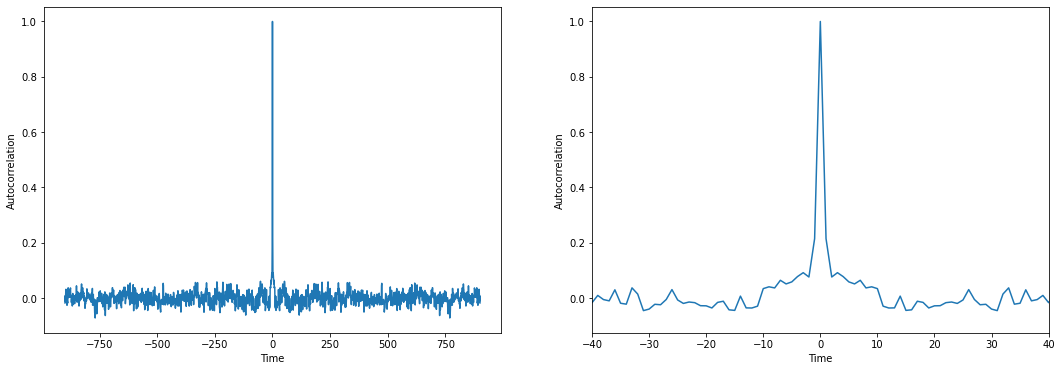

In [21]:
autocorr_lags_flut = np.arange(-1*(len(_autocorr_dict['FLUT']) // 2),len(_autocorr_dict['FLUT']) // 2+1)

flut_autocorr_fig,flut_autocorr_axs = plt.subplots(1,2,figsize=(18,6))
flut_autocorr_axs[0].plot(autocorr_lags_flut,_autocorr_dict['FLUT'])

flut_autocorr_axs[1].plot(autocorr_lags_flut,_autocorr_dict['FLUT'])
flut_autocorr_axs[1].set_xlim(-40,40)

flut_autocorr_axs[0].set_xlabel('Time')
flut_autocorr_axs[0].set_ylabel('Autocorrelation')
flut_autocorr_axs[1].set_xlabel('Time')
flut_autocorr_axs[1].set_ylabel('Autocorrelation')

In [22]:
_autocorr_dict['TS'].sum()

0.6754109001640098

Text(0, 0.5, 'Autocorrelation')

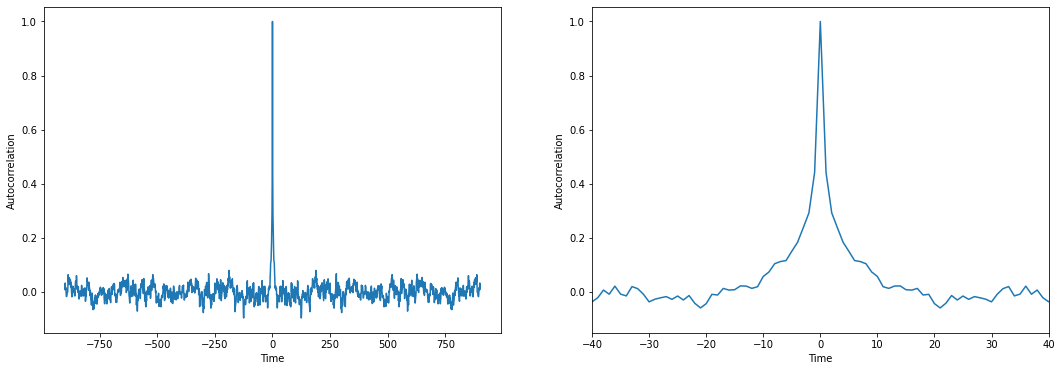

In [23]:
autocorr_lags_ts = np.arange(-1*(len(_autocorr_dict['TS']) // 2),len(_autocorr_dict['TS']) // 2+1)

ts_autocorr_fig,ts_autocorr_axs = plt.subplots(1,2,figsize=(18,6))
ts_autocorr_axs[0].plot(autocorr_lags_ts,_autocorr_dict['TS'])

ts_autocorr_axs[1].plot(autocorr_lags_ts,_autocorr_dict['TS'])
ts_autocorr_axs[1].set_xlim(-40,40)

ts_autocorr_axs[0].set_xlabel('Time')
ts_autocorr_axs[0].set_ylabel('Autocorrelation')
ts_autocorr_axs[1].set_xlabel('Time')
ts_autocorr_axs[1].set_ylabel('Autocorrelation')

##### Calculate $\tau_{var}$

The Leroy paper notes that significant autocorrelation is unlikely to occur for lags greater than a few years, motivating us to truncate the autocorrelation at some lag where noise starts to dominate. We need to have a method to do this however. Since the "noise" is not actually centered about zero, I'll sum over the autocorrelation function and pick tau as the maximum value. This might lead to tau values slightly enhanced by noise, and is perhaps conservative, but I think it's probably the safest strategy.

In [24]:
def calc_tauvar(autocorrelation_data,max_lag=100,verbose=True):
    ''' 
    The Leroy paper notes that significant autocorrelation is unlikely to occur for lags greater than a few years, 
    motivating us to truncate the autocorrelation at some lag where noise starts to dominate. We need to have a method 
    to do this however. Since the "noise" is not actually centered about zero, I'll sum over the autocorrelation 
    function and pick tau as the maximum value. This might lead to tau values slightly enhanced by noise, and is 
    perhaps conservative, but I think it's probably the safest strategy.
    '''
    
    midpoint = len(autocorrelation_data)//2 # index for the midpoint of the autocorrelation data
    
    try:
        np.testing.assert_almost_equal(autocorrelation_data[midpoint],1,decimal=5) # This point should be 1 if the autocorrelation is formatted correctly and normalized
    except:
        print("Midpoint of 'autocorrelation_data' is not 1. Check that data is symmetric and normalized.")
        return np.nan
    
    tau_summer = [] # array containing tau as a function of lags considered
    lags = [] # array containing the lags tested (reference)

    for lag in range(1,max_lag+1): # iterate over possible lags

        pointsabout = autocorrelation_data[midpoint-lag:midpoint+1+lag] # get all points within the lag for the autocorrelation function
        test_tau = np.sum(pointsabout) 

        tau_summer.append(test_tau)
        lags.append(lag)
    
    max_tau = np.max(tau_summer)
    
    if verbose:
        print('Maximum Tau of %.2f found at lag %d.' % (max_tau,lags[np.argmax(tau_summer)]))
    
    return max_tau

The values I get from this method are <10% greater than values I found when arbitrarily generating cutoff lags, so I think that this method is reasonable and conservative. The detection time is proportional to the cubic root of $\tau_{var}$, so even a 10% error becomes more like 3% in the final product.

Now, calculate $\tau_{var}$ for our variables.

In [25]:
_tauvar_dict = {}
_tauvar_monthly_list   = []


for _var in ens_vars:
    print(_var)
    _tauvar_dict[_var] = calc_tauvar(_autocorr_dict[_var],verbose=False)
    
    _monthly_tauvars = cesm1_pic_ds[_var].groupby('time.month').map(calc_tauvar_wrapper) # this calculates the autocorr on its way to tauvar, so its fine
    _monthly_tauvars.name = _var # assign the correct name for future concatenation
    
    _tauvar_monthly_list.append(_monthly_tauvars)
    
tauvar_monthly_ds = xr.merge(_tauvar_monthly_list) # FSNTOA December tauvar is None, good job code!

FLUT
FLUTC
TS
ICEFRAC
TMQ
FSNTOA
Midpoint of 'autocorrelation_data' is not 1. Check that data is symmetric and normalized.
FSNTOAC
Midpoint of 'autocorrelation_data' is not 1. Check that data is symmetric and normalized.
FSNS
Midpoint of 'autocorrelation_data' is not 1. Check that data is symmetric and normalized.
FSNSC
Midpoint of 'autocorrelation_data' is not 1. Check that data is symmetric and normalized.


In [26]:
_tauvar_dict

{'FLUT': 2.4907143475617675,
 'FLUTC': 3.638582194292363,
 'TS': 4.722961458304506,
 'ICEFRAC': 5.796937088191588,
 'TMQ': 2.5465758553483795,
 'FSNTOA': 3.338208130057043,
 'FSNTOAC': 3.9077202773681434,
 'FSNS': 3.3723526647141053,
 'FSNSC': 4.097306995995283}

These results indicate more memory in surface temperature than OLR, and that sea ice has the most memory of our variables. Alone this would have the effect of making the effective number of surface temperature measurements fewer, thus delaying detection. But we also have to consider the natural variability term.

In [27]:
tauvar_monthly_ds['TS']

<xarray.DataArray 'TS' (month: 12)>
array([1.91831336, 1.94097106, 2.18951796, 1.6833065 , 1.73030858,
       1.66243602, 2.12330941, 3.29813429, 3.32786604, 3.31853725,
       2.56750883, 2.29411098])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

There is more memory for surface temperatures in the fall and winter, interesting.

Compute the Leroy time-to-detection values for the annual data.

In [28]:
# compute delta-t, the time-to-detection from Leroy et al. (2008)
# $$ \Delta t = \left[ \frac{12s^2}{m_{est}^2} \sigma_{var}^2 \tau_{var} \right]^{1/3}, $$

deltaT_dict = {}

s = 2 # SNR is two (two standard deviations gives a 95% confidence interval)

for _var in ens_vars:
    print(_var)
    # Grab the stored values for the appropriate variable
    _slope  = _regress_dict[_var][0]
    _stddev = _sigmaN_dict[_var]
    _tauvar = _tauvar_dict[_var]
    
    _deltaT = (12*s**2 * _stddev**2 * _tauvar / _slope**2)**(1/3) # time calculated using a correlation time from the summing method    
    
    deltaT_dict[_var] = _deltaT    

FLUT
FLUTC
TS
ICEFRAC
TMQ
FSNTOA
FSNTOAC
FSNS
FSNSC


Compute the Leroy time-to-detection values for the monthly data.

In [29]:
# compute delta-t, the time-to-detection from Leroy et al. (2008)
# $$ \Delta t = \left[ \frac{12s^2}{m_{est}^2} \sigma_{var}^2 \tau_{var} \right]^{1/3}, $$

deltaT_monthly_dict = {}

s = 2 # SNR is two (two standard deviations gives a 95% confidence interval)

for _var in ens_vars:
    print(_var)
    
    # Grab the stored values for the appropriate variable
    _slopes_monthly  = regress_monthly[_var].sel(degree=1)
    _stddevs_monthly = stddev_monthly_ds[_var]
    _tauvar_monthly  = tauvar_monthly_ds[_var]
    
    _deltaT = (12*s**2 * _stddevs_monthly**2 * _tauvar_monthly / _slopes_monthly**2)**(1/3) # time calculated using a correlation time from the summing method    
    _deltaT.name = _var
    
    deltaT_monthly_dict[_var] = _deltaT
    
deltaT_monthly_ds = xr.merge(deltaT_monthly_dict.values())

FLUT
FLUTC
TS
ICEFRAC
TMQ
FSNTOA
FSNTOAC
FSNS
FSNSC


__Leroy time-to-detection values:__

In [30]:
deltaT_dict

{'FLUT': <xarray.DataArray 'FLUT' ()>
 array(21.35153202),
 'FLUTC': <xarray.DataArray 'FLUTC' ()>
 array(20.74746822),
 'TS': <xarray.DataArray 'TS' ()>
 array(18.27381001),
 'ICEFRAC': <xarray.DataArray 'ICEFRAC' ()>
 array(15.91834463),
 'TMQ': <xarray.DataArray 'TMQ' ()>
 array(13.85200451),
 'FSNTOA': <xarray.DataArray 'FSNTOA' ()>
 array(17.77837962),
 'FSNTOAC': <xarray.DataArray 'FSNTOAC' ()>
 array(18.90219139),
 'FSNS': <xarray.DataArray 'FSNS' ()>
 array(19.34674754),
 'FSNSC': <xarray.DataArray 'FSNSC' ()>
 array(20.20232108)}

These values are much longer than those predicted by the Weatherhead method, which is confusing because I think they are identical besides using lag-1 autocorrelation vs. sum of the autocorrelation to look at data redness. Again, we see that with perfect observations, it takes about 3 years longer to detect a change in Arctic annual OLR than TS. This is longer, but not by a factor of two.

In [31]:
deltaT_monthly_ds['ICEFRAC']

<xarray.DataArray 'ICEFRAC' (month: 12)>
array([34.1548168 , 39.103738  , 44.02370684, 43.1396705 , 35.54164715,
       26.45433882, 15.20405719, 14.08544928, 15.14215567, 12.43076547,
       10.69144673, 21.19023164])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    degree   int64 1

Wow! There is a 34 year difference in the projected detection time for sea ice fraction in November versus March.

In [32]:
deltaT_monthly_ds['TS']

<xarray.DataArray 'TS' (month: 12)>
array([22.63459301, 25.39680848, 27.9915695 , 27.42378755, 23.89338943,
       21.85776615, 21.29365218, 19.44801241, 18.74809873, 18.00592649,
       16.0894179 , 18.85219673])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    degree   int64 1

In [33]:
deltaT_monthly_ds['FLUT']

<xarray.DataArray 'FLUT' (month: 12)>
array([33.96225149, 36.4193907 , 40.83317907, 40.86948934, 35.38993426,
       37.94505374, 32.75589518, 26.61804841, 23.46417506, 24.37159536,
       22.13349607, 24.99756456])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    degree   int64 1

The largest difference in detection times between months for surface temperature is ~9-10, but the largest difference for OLR is ~18. We could evaluate whether this is a cloud damping effect by adding in the clear-sky or clear-sky surface OLR (a la Sledd (2021)).

#### Shaw time-to-detection values

The fractional uncertainty in the detection time is equal to the fractional uncertainty in the forced response, multiplied by a scaling factor of $2/3$. This is easy to apply and think about, if the forced response is highly uncertain, most of that uncertainty will be passed along to the detection time. For climate processes and observational periods where $\delta m_{est}$ is large, the confidence bounds on the detection time will increase above $t_f - t_0$. In this case, we cannot reasonably argue the detection is guaranteed to occur, so we must amend our definition of $n$:


$$ n = min \left(\left[\frac{12s^2}{m_{est}(t_0,t_f)^2}\sigma_{var}(t_0,t_f)^2 \tau_{var}(t_0,t_f)\right]^{1/3}(1+f(t_0,t_f)^2)^{1/3}\left(1+\frac{2}{3}\frac{\delta m_{est}}{m_{est}}(t_0,t_f)\right) < t_f - t_0 \right) $$

I have need to calculate the slope, standard deviation, and autocorrelation as a function of the duration (). I should also calculate the 95% confidence interval at the same time.

I will start with the slope values, since this will be the easiest and should have the largest impact. I need to calculate the slopes xarray objects earlier and then bootstrap a 95% confidence interval on the slopes. Later, I should calculate the variance and autocorrelation.

Now I just need to generate percentiles for the forced response and compare those lower bounds with the 95th percentiles of internal variability.

In [35]:
min_duration = 2
max_duration = 50

durations = np.arange(min_duration,max_duration+1)

In [37]:
nmembers=40

annavg_slopes_dict = {}
monthly_slopes_dict = {}

for _var in ens_vars:    
    ens_tseries = cesm1_ensresponse_ds[_var] # select your variable
    
    ens_tseries_ann = ens_tseries.groupby('time.year').mean('time') # turn into annual tseries
    
    lens_slopes_dict = {}
    lens_slopes_monthly_dict = {}
    for _dur in durations: # iterate over possible detection durations 
        tseries_dur_subset = ens_tseries_ann.isel(year=slice(None,_dur)) # subset the annual resolution data in time
        tseries_dur_monthly_subset = ens_tseries.isel(time=slice(None,12*_dur)) # subset the monthly resolution data in time

        _lens_polyfit = tseries_dur_subset.polyfit(dim='year',deg=1) # take a linear fit
        _lens_slopes = _lens_polyfit['polyfit_coefficients'].sel(degree=1).values # pull out the slope from the linear fit

        _lens_polyfit_monthly = tseries_dur_monthly_subset.groupby('time.month').map(linear_polyfit)
        _lens_slopes_monthly  = _lens_polyfit_monthly['polyfit_coefficients'].sel(degree=1).values

        lens_slopes_dict[_dur] = _lens_slopes # save slopes in an inner dictionary
        lens_slopes_monthly_dict[_dur] = _lens_slopes_monthly

    # shift the data to an xarray object so future operations do not require iteration
    _temp_slopes_da = xr.DataArray(
        data=np.stack(list(lens_slopes_dict.values()),axis=1),
        dims=["ens", "duration"],
        coords=dict(
            ens=(np.arange(1,nmembers+1)),
            duration=(durations),
        ),
        name = _var
    )
    
    _temp_slopes_monthly_da = xr.DataArray(
        data=np.stack(list(lens_slopes_monthly_dict.values()),axis=2),
        dims=["month", "ens", "duration"],
        coords=dict(
            ens=(np.arange(1,nmembers+1)),
            duration=(durations),
            month=np.arange(1,13,1),
        ),
        name = _var
    )
    
    annavg_slopes_dict[_var] = _temp_slopes_da
    monthly_slopes_dict[_var] = _temp_slopes_monthly_da
    
    del lens_slopes_dict,lens_slopes_monthly_dict
                
lens_slopes_dur_ds = xr.merge(annavg_slopes_dict.values())
lens_slopes_monthly_dur_ds = xr.merge(monthly_slopes_dict.values())

del annavg_slopes_dict,monthly_slopes_dict

Bootstrap percentiles on the forced response trend for our different durations.

In [38]:
def bootstrap_percentiles2(varname,slope_ds,durations,alpha,nbootstraps=2000):
    '''
    Function to bootstrap 5th and 95th percentiles AND the mean(!!) on slopes for different durations,
    and return the result in an xarray format.
    Assumes that it will be passed a xr.dataset object and list of durations.
    '''
    
    _bounds_dict_bstrap_dur = {} # empty dictionary to store objects in
        
    for _dur in durations:
        # select slopes for a given duration and variable, drop nans
        _slopes     = slope_ds[varname].sel(duration=_dur).dropna(dim='ens') 
        N_ens       = len(_slopes) # number of members

        # Compute percentiles using bootstrapping
        lower_percentile = []
        upper_percentile = []
        median_slope = []
        
        for i in range(1,nbootstraps): # bootstrap, calculating percentiles
            resample_slopes = np.random.choice(_slopes, N_ens, replace=True) # resample with replacement
            lower_percentile.append(np.percentile(resample_slopes,100*(alpha/2)))
            upper_percentile.append(np.percentile(resample_slopes,100*(1-alpha/2)))
            median_slope.append(np.median(resample_slopes))
        
        _lower_bnd_bstrap    = np.mean(lower_percentile) # take the mean percentile
        _upper_bnd_bstrap    = np.mean(upper_percentile)
        _median_slope_bstrap = np.mean(median_slope)
        
        _bounds_dict_bstrap_dur[_dur] = [_lower_bnd_bstrap,_upper_bnd_bstrap,_median_slope_bstrap] # save in the dictionary
                
    # save output in an xarray format for easy future usage
    _bounds_da = xr.DataArray(
        data=np.stack(list(_bounds_dict_bstrap_dur.values()),axis=1),
        dims=["bound", "duration"],
        coords=dict(
            bound=[0,1,2], # 0 is the lower bound (5th perc.) and 1 is the upper bound (95th perc.)
            duration=(durations),
        ),
        name = varname
    )
    
    del _bounds_dict_bstrap_dur # clean up
    
    return _bounds_da

In [39]:
def bootstrap_percentiles_monthly2(varname,slope_ds,durations,alpha,nbootstraps=2000):
    '''
    Function to bootstrap 5th and 95th percentiles on slopes for different durations,
    and return the result in an xarray format.
    Assumes that it will be passed a xr.dataset object and list of durations.
    '''

    _bounds_dict_bstrap_dur = {} # empty dictionary to store objects in

    gen = np.random.Generator(np.random.PCG64()) # generator object for sampling a n-D array
        
    for _dur in durations:
        # select slopes for a given duration and variable, drop nans
        _slopes     = slope_ds[varname].sel(duration=_dur).dropna(dim='ens') 
        N_ens       = len(_slopes['ens']) # number of members

        # Compute percentiles using bootstrapping
        lower_percentile = []
        upper_percentile = []
        median_slope = []
        
        for i in range(nbootstraps): # bootstrap, calculating percentiles
            # resample along the ensemble dimension (axis 1)
            resample_slopes = gen.choice(_slopes, size=N_ens, replace=True,axis=1)
            # compute percentiles along the ensemble dimension (axis 1)
            lower_percentile.append(np.percentile(resample_slopes,100*(alpha/2),axis=1))
            upper_percentile.append(np.percentile(resample_slopes,100*(1-alpha/2),axis=1))
            median_slope.append(np.median(resample_slopes,axis=1))
            
        _lower_bnd_bstrap    = np.mean(lower_percentile,axis=0) # take the mean percentile along the correct axis
        _upper_bnd_bstrap    = np.mean(upper_percentile,axis=0)
        _median_slope_bstrap = np.mean(median_slope,axis=0)
        
        _bounds_dict_bstrap_dur[_dur] = [_lower_bnd_bstrap,_upper_bnd_bstrap,_median_slope_bstrap] # save in the dictionary
    
    # print(np.stack(list(_bounds_dict_bstrap_dur.values()),axis=1).shape)
    # break
    # save output in an xarray format for easy future usage
    _bounds_da = xr.DataArray(
        data=np.stack(list(_bounds_dict_bstrap_dur.values()),axis=1),
        dims=["bound", "duration", "month"],
        coords=dict(
            bound=[0,1,2], # 0 is the lower bound (5th perc.) and 1 is the upper bound (95th perc.)
            duration=(durations),
            month=np.arange(1,13,1),
        ),
        name = varname
    )
    
    del _bounds_dict_bstrap_dur # clean up
    
    return _bounds_da

In [40]:
# bootstrapping precentiles approach
confidence_int = 95
alpha = 1 - 0.01*confidence_int
# print('alpha ',alpha)

_temp_dict         = {}
_temp_dict_monthly = {}

for _var in ens_vars:
    
    _temp_dict[_var]         = bootstrap_percentiles2(varname=_var,slope_ds=lens_slopes_dur_ds,alpha=alpha,durations=durations)
    _temp_dict_monthly[_var] = bootstrap_percentiles_monthly2(varname=_var,slope_ds=lens_slopes_monthly_dur_ds,alpha=alpha,durations=durations)
    
lens_bounds_dur_ds         = xr.merge(_temp_dict.values()) # combine into xarray so indexing is straightforward
lens_bounds_monthly_dur_ds = xr.merge(_temp_dict_monthly.values()) # combine into xarray so indexing is straightforward

KeyboardInterrupt: 

Compute the Shaw time-to-detection values for the annual data.

In [442]:
# compute delta-t, the time-to-detection from Leroy et al. (2008)
# $$ n = min \left(\left[\frac{12s^2}{m_{est}(t_0,t_f)^2}\sigma_{var}(t_0,t_f)^2 \tau_{var}(t_0,t_f)\right]^{1/3}\left(1+\frac{2}{3}\frac{\delta m_{est}}{m_{est}}(t_0,t_f)\right) < t_f - t_0 \right) $$

shawT_dict = {}
shawT_monthly_dict = {}

s = 2 # SNR is two (two standard deviations gives a 95% confidence interval)

for _var in ens_vars:
    print(_var)
    # Grab the stored values for the appropriate variable
    _slope_low     = lens_bounds_dur_ds[_var].sel(bound=0)
    _slope_high    = lens_bounds_dur_ds[_var].sel(bound=1)
    _slope_median  = lens_bounds_dur_ds[_var].sel(bound=2)
    _stddev = _sigmaN_dict[_var]
    _tauvar = _tauvar_dict[_var]
    
    _deltaT_low    = (12*s**2 * _stddev**2 * _tauvar / _slope_low**2)**(1/3) # time calculated using a correlation time from the summing method    
    _deltaT_high   = (12*s**2 * _stddev**2 * _tauvar / _slope_high**2)**(1/3) # time calculated using a correlation time from the summing method    
    _deltaT_median = (12*s**2 * _stddev**2 * _tauvar / _slope_median**2)**(1/3) # time calculated using a correlation time from the summing method    
    
    # recombine
    _deltaT_all = xr.merge([_deltaT_low.assign_coords({'bound':0}).expand_dims('bound',axis=1),
                            _deltaT_high.assign_coords({'bound':1}).expand_dims('bound',axis=1),
                            _deltaT_median.assign_coords({'bound':2}).expand_dims('bound',axis=1)]
                          )
    # _deltaT_all = xr.merge([_deltaT_low.assign_coords({'bound':2.5}).expand_dims('bound',axis=1),
    #                         _deltaT_high.assign_coords({'bound':97.5}).expand_dims('bound',axis=1),
    #                         _deltaT_median.assign_coords({'bound':50}).expand_dims('bound',axis=1)]
    #                       )
    
    shawT_dict[_var] = _deltaT_all
    
################### Do for monthly values
    _slope_low_monthly     = lens_bounds_monthly_dur_ds[_var].sel(bound=0)
    _slope_high_monthly    = lens_bounds_monthly_dur_ds[_var].sel(bound=1)
    _slope_median_monthly  = lens_bounds_monthly_dur_ds[_var].sel(bound=2)
    _stddevs_monthly = stddev_monthly_ds[_var]
    _tauvar_monthly  = tauvar_monthly_ds[_var]
    
    _deltaT_low_monthly    = (12*s**2 * _stddevs_monthly**2 * _tauvar_monthly / _slope_low_monthly**2)**(1/3) # time calculated using a correlation time from the summing method    
    _deltaT_high_monthly   = (12*s**2 * _stddevs_monthly**2 * _tauvar_monthly / _slope_high_monthly**2)**(1/3) # time calculated using a correlation time from the summing method    
    _deltaT_median_monthly = (12*s**2 * _stddevs_monthly**2 * _tauvar_monthly / _slope_median_monthly**2)**(1/3) # time calculated using a correlation time from the summing method    
    
    # recombine
    _deltaT_monthly_all = xr.merge([_deltaT_low_monthly.assign_coords({'bound':0}).expand_dims('bound',axis=1),
                            _deltaT_high_monthly.assign_coords({'bound':1}).expand_dims('bound',axis=1),
                            _deltaT_median_monthly.assign_coords({'bound':2}).expand_dims('bound',axis=1)]
                          )
    # _deltaT_monthly_all = xr.merge([_deltaT_low_monthly.assign_coords({'bound':2.5}).expand_dims('bound',axis=1),
    #                         _deltaT_high_monthly.assign_coords({'bound':97.5}).expand_dims('bound',axis=1),
    #                         _deltaT_median_monthly.assign_coords({'bound':50}).expand_dims('bound',axis=1)]
    #                       )
    
    shawT_monthly_dict[_var] = _deltaT_monthly_all
        
shawT_ds = xr.merge(shawT_dict.values())
shawT_monthly_ds = xr.merge(shawT_monthly_dict.values())

FLUT
TS
ICEFRAC
TMQ
FSNTOA


In [437]:
detect_shawT_ds = shawT_ds < shawT_ds.duration
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_shawT_ds.duration.broadcast_like(detect_shawT_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_shawT_ds = 1 + duration_broad.where(~detect_shawT_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_shawT_ds = xr.where(emergence_shawT_ds > 50,np.nan,emergence_shawT_ds)

In [443]:
detect_shawT_monthly_ds = shawT_monthly_ds < shawT_monthly_ds.duration
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_shawT_monthly_ds.duration.broadcast_like(detect_shawT_monthly_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_shawT_monthly_ds = 1 + duration_broad.where(~detect_shawT_monthly_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_shawT_monthly_ds = xr.where(emergence_shawT_monthly_ds > 50,np.nan,emergence_shawT_monthly_ds)
# emergence_shawT_monthly_ds = xr.where(emergence_shawT_monthly_ds > 50,np.nan,emergence_shawT_monthly_ds)

In [160]:
# def bootstrap_slope_values(varname,slope_ds,durations,alpha,nbootstraps=2000):
#     '''
#     Function to bootstrap percentiles AND the mean(!!) on slopes for different durations,
#     and return the result in an xarray format.
#     Assumes that it will be passed a xr.dataset object and list of durations.
#     '''
    
#     _bounds_dict_bstrap_dur = {} # empty dictionary to store objects in
        
#     for _dur in durations:
#         # select slopes for a given duration and variable, drop nans
#         _slopes     = slope_ds[varname].sel(duration=_dur).dropna(dim='ens') 
#         N_ens       = len(_slopes) # number of members

#         # Compute percentiles using bootstrapping
#         lower_percentile = []
#         upper_percentile = []
#         median_slope = []
        
#         for i in range(1,nbootstraps): # bootstrap, calculating percentiles
#             resample_slopes = np.random.choice(_slopes, N_ens, replace=True) # resample with replacement
#             lower_percentile.append(np.percentile(resample_slopes,100*(alpha/2)))
#             upper_percentile.append(np.percentile(resample_slopes,100*(1-alpha/2)))
#             median_slope.append(np.median(resample_slopes))
        
#         _lower_bnd_bstrap    = np.mean(lower_percentile) # take the mean percentile
#         _upper_bnd_bstrap    = np.mean(upper_percentile)
#         _median_slope_bstrap = np.mean(median_slope)
        
#         _bounds_dict_bstrap_dur[_dur] = [_lower_bnd_bstrap,_upper_bnd_bstrap,_median_slope_bstrap] # save in the dictionary
                
#     # save output in an xarray format for easy future usage
#     _bounds_da = xr.DataArray(
#         data=np.stack(list(_bounds_dict_bstrap_dur.values()),axis=1),
#         dims=["bound", "duration"],
#         coords=dict(
#             bound=[0,1,2], # 0 is the lower bound (5th perc.) and 1 is the upper bound (95th perc.)
#             duration=(durations),
#         ),
#         name = varname
#     )
    
#     del _bounds_dict_bstrap_dur # clean up
    
#     return _bounds_da

#### Naive LENS-based time-to-detection method

Here, I intend to produce time-to-detection estimates using the output from the CESM1 and CESM2 Large Ensemble datasets that are somewhat analogous to the signal-to-noise methods employed previously. These methods define time-to-detection as when the mean forced response exceeds the natural climate variability at 95% confidence. I can do the same by creating a 95% confidence intervals (~2 std. devs. to be comparable with Weatherhead and Leroy) and comparing them to a linear trend calculated from the large ensemble forced response. Importantly, I am __not__ calculating a 95% confidence interval on the "true" unforced trend. We know that the unforced trend is zero. We want to know a range of trends that 95% of unforced models fall into, which represents a reasonable range of internal variability. 

I expect these results to be similar to those estimated from the Leroy method.

I will robustly calculate the 95% confidence interval for observational durations of 2 to 50 years using bootstrapping. "Naive detection" will occur when the climate signal from the forced response lies outside of this confidence interval.

Calculate a 95% confidence interval on unforced trends in our climate signals for observation durations from 2 to 50 years.

In [29]:
def pi_tseries_to_ens(pic_var_dict,tlength,nmembers,verbose=True):
    '''
    This function takes a long control run and returns N (nmembers) non-overlapping members of length tlength (years).
    If the long control run does not have enough time for this, the function returns as many members as fit in.
    '''
    
    month_increment = tlength*12 # length of the timeseries

    pic_final_dict = {}
    for _var in pic_var_dict: # iterate over keys, which are the variables
        if verbose:
            print(_var)

        pic_tseries_dict = {}

        for mem_n in range(nmembers):
            # Define index start and endpoints
            start_index = mem_n*month_increment
            end_index = start_index + month_increment

            if end_index > len(pic_var_dict[_var].time):
                print('Cannot fit %d non-overlapping ensemble members of %d years in the available data. Returning %d members.' % (nmembers,tlength,mem_n))
                break
            sub_tseries = pic_var_dict[_var].isel(time=slice(start_index,end_index))

            # print(sub_tseries.time) # test code demonstrates non-overlapping t-series

            # create a fake timeseries so that we can combine these fake ensemble members
            # timeseries must be between print(pd.Timestamp.min) and print(pd.Timestamp.max) 1677 and 2262 roughly. I am just starting mine at 1700 so they are obviously PI
            new_times = pd.date_range('1700/01/01',freq='1M',periods=month_increment,closed=None) 
            new_times_da = xr.DataArray(new_times, [('time', new_times)]) # turn into an xarray object
            sub_tseries_timefixed = sub_tseries.assign_coords({'time':new_times_da})

            sub_tseries_timefixed['ens'] = mem_n # add ensemble coordinate for easy combining

            pic_tseries_dict[str(mem_n)] = sub_tseries_timefixed

        pic_all_tseries = xr.concat(list(pic_tseries_dict.values()),dim='ens')

        pic_final_dict[_var] = pic_all_tseries
    
    return pic_final_dict

Compute slopes on unforced slopes for observation durations between 2 and 50 years.

In [32]:
nmembers=40
# pic_slopes_dict_yr_var = {} # the most outside indexer is the variable (var) and the inner indexer is the year (yr)
annavg_slopes_dict = {}
monthly_slopes_dict = {}

for _var in ens_vars: # iterate over variables of interest
    _var_pic_tseries = cesm1_pic_ds[[_var]] # pi_tseries_to_ens operates on an xr.dataset, so I use double brackets

    lens_slopes_dict = {}
    lens_slopes_monthly_dict = {}
    for _dur in durations: # iterate over possible detection durations
        
        members_of_dur = pi_tseries_to_ens(_var_pic_tseries,tlength=_dur,nmembers=nmembers,verbose=False) # aim for 40 members (same as the CESM1-LENS)
        members_of_dur_annavgs = members_of_dur[_var].groupby('time.year').mean() # compute an annual mean

        _lens_polyfit_annavg = members_of_dur_annavgs.polyfit(dim='year',deg=1) # take a linear fit
        _lens_slopes = _lens_polyfit_annavg['polyfit_coefficients'].sel(degree=1).values # pull out the slope from the linear fit

        _lens_polyfit_monthly = members_of_dur[_var].groupby('time.month').map(linear_polyfit)
        _lens_slopes_monthly  = _lens_polyfit_monthly['polyfit_coefficients'].sel(degree=1).values
        
        # pad with nans out to the desired number of members, will need to remember this later
        padding = np.nan*np.zeros(nmembers - len(_lens_slopes))
        padding_monthly = np.nan*np.zeros((12,nmembers - len(_lens_slopes)))
        
        _lens_slopes_padded         = np.concatenate((_lens_slopes,padding),axis=0)
        _lens_slopes_monthly_padded = np.concatenate((_lens_slopes_monthly,padding_monthly),axis=1) # month goes first
        
        lens_slopes_dict[_dur]        = _lens_slopes_padded # save slopes in an inner dictionary
        lens_slopes_monthly_dict[_dur] = _lens_slopes_monthly_padded
        
    # shift the data to an xarray object so future operations do not require iteration
    _temp_slopes_da = xr.DataArray(
        data=np.stack(list(lens_slopes_dict.values()),axis=1),
        dims=["ens", "duration"],
        coords=dict(
            ens=(np.arange(1,nmembers+1)),
            duration=(durations),
        ),
        name = _var
    )
    
    _temp_slopes_monthly_da = xr.DataArray(
        data=np.stack(list(lens_slopes_monthly_dict.values()),axis=2),
        dims=["month", "ens", "duration"],
        coords=dict(
            ens=(np.arange(1,nmembers+1)),
            duration=(durations),
            month=np.arange(1,13,1),
        ),
        name = _var
    )
    
    annavg_slopes_dict[_var]  = _temp_slopes_da
    monthly_slopes_dict[_var] = _temp_slopes_monthly_da
    
    del lens_slopes_dict,lens_slopes_monthly_dict
    # pic_slopes_dict_yr_var[_var] = lens_slopes_dict
    # break

pic_slopes_dur_ds = xr.merge(annavg_slopes_dict.values())
pic_slopes_monthly_dur_ds = xr.merge(monthly_slopes_dict.values())

del annavg_slopes_dict,monthly_slopes_dict

Cannot fit 40 non-overlapping ensemble members of 46 years in the available data. Returning 39 members.
Cannot fit 40 non-overlapping ensemble members of 47 years in the available data. Returning 38 members.
Cannot fit 40 non-overlapping ensemble members of 48 years in the available data. Returning 37 members.
Cannot fit 40 non-overlapping ensemble members of 49 years in the available data. Returning 36 members.
Cannot fit 40 non-overlapping ensemble members of 50 years in the available data. Returning 36 members.
Cannot fit 40 non-overlapping ensemble members of 46 years in the available data. Returning 39 members.
Cannot fit 40 non-overlapping ensemble members of 47 years in the available data. Returning 38 members.
Cannot fit 40 non-overlapping ensemble members of 48 years in the available data. Returning 37 members.
Cannot fit 40 non-overlapping ensemble members of 49 years in the available data. Returning 36 members.
Cannot fit 40 non-overlapping ensemble members of 50 years in th

Compute 95% confidence intervals on unforced slopes for observation durations between 2 and 50 years.

The methods produce similar results, but bootstrapping takes a bit longer. The issue here is that we're not interested in a 95% confidence interval on the mean slope. We know that the mean slope is zero. We interested in a slope that exceeds 95% of the models. This is actually easier, as we can just bootstrap the 95th percentile. So I'll repeat and just bootstrap the 5th and 9th percentiles.

__Now I could do this slowly or rewrite my bootstrapping code to leverage the vectorized calls.__

In [33]:
def bootstrap_percentiles(varname,slope_ds,durations,alpha,nbootstraps=2000):
    '''
    Function to bootstrap 5th and 95th percentiles on slopes for different durations,
    and return the result in an xarray format.
    Assumes that it will be passed a xr.dataset object and list of durations.
    '''
    
    _bounds_dict_bstrap_dur = {} # empty dictionary to store objects in
        
    for _dur in durations:
        # select slopes for a given duration and variable, drop nans
        _slopes     = slope_ds[varname].sel(duration=_dur).dropna(dim='ens') 
        N_ens       = len(_slopes) # number of members

        # Compute percentiles using bootstrapping
        lower_percentile = []
        upper_percentile = []
        for i in range(1,nbootstraps): # bootstrap, calculating percentiles
            resample_slopes = np.random.choice(_slopes, N_ens, replace=True) # resample with replacement
            lower_percentile.append(np.percentile(resample_slopes,100*(alpha/2)))
            upper_percentile.append(np.percentile(resample_slopes,100*(1-alpha/2)))
        
        _lower_bnd_bstrap = np.mean(lower_percentile) # take the mean percentile
        _upper_bnd_bstrap = np.mean(upper_percentile)
        
        _bounds_dict_bstrap_dur[_dur] = [_lower_bnd_bstrap,_upper_bnd_bstrap] # save in the dictionary
        
    # save output in an xarray format for easy future usage
    _bounds_da = xr.DataArray(
        data=np.stack(list(_bounds_dict_bstrap_dur.values()),axis=1),
        dims=["bound", "duration"],
        coords=dict(
            bound=[0,1], # 0 is the lower bound (5th perc.) and 1 is the upper bound (95th perc.)
            duration=(durations),
        ),
        name = varname
    )
    
    del _bounds_dict_bstrap_dur # clean up
    
    return _bounds_da

In [34]:
def bootstrap_percentiles_monthly(varname,slope_ds,durations,alpha,nbootstraps=2000):
    '''
    Function to bootstrap 5th and 95th percentiles on slopes for different durations,
    and return the result in an xarray format.
    Assumes that it will be passed a xr.dataset object and list of durations.
    '''

    _bounds_dict_bstrap_dur = {} # empty dictionary to store objects in

    gen = np.random.Generator(np.random.PCG64()) # generator object for sampling a n-D array
        
    for _dur in durations:
        # select slopes for a given duration and variable, drop nans
        _slopes     = slope_ds[varname].sel(duration=_dur).dropna(dim='ens') 
        N_ens       = len(_slopes['ens']) # number of members

        # Compute percentiles using bootstrapping
        lower_percentile = []
        upper_percentile = []
        for i in range(nbootstraps): # bootstrap, calculating percentiles
            # resample along the ensemble dimension (axis 1)
            resample_slopes = gen.choice(_slopes, size=N_ens, replace=True,axis=1)
            # compute percentiles along the ensemble dimension (axis 1)
            lower_percentile.append(np.percentile(resample_slopes,100*(alpha/2),axis=1))
            upper_percentile.append(np.percentile(resample_slopes,100*(1-alpha/2),axis=1))
            
        _lower_bnd_bstrap = np.mean(lower_percentile,axis=0) # take the mean percentile along the correct axis
        _upper_bnd_bstrap = np.mean(upper_percentile,axis=0)
        
        _bounds_dict_bstrap_dur[_dur] = [_lower_bnd_bstrap,_upper_bnd_bstrap] # save in the dictionary
    
    # print(np.stack(list(_bounds_dict_bstrap_dur.values()),axis=1).shape)
    # break
    # save output in an xarray format for easy future usage
    _bounds_da = xr.DataArray(
        data=np.stack(list(_bounds_dict_bstrap_dur.values()),axis=1),
        dims=["bound", "duration", "month"],
        coords=dict(
            bound=[0,1], # 0 is the lower bound (5th perc.) and 1 is the upper bound (95th perc.)
            duration=(durations),
            month=np.arange(1,13,1),
        ),
        name = varname
    )
    
    del _bounds_dict_bstrap_dur # clean up
    
    return _bounds_da

In [36]:
# bootstrapping precentiles approach
confidence_int = 95
alpha = 1 - 0.01*confidence_int
# print('alpha ',alpha)

_temp_dict = {}
_temp_dict_monthly = {}

for _var in ens_vars:
    
    _temp_dict[_var] = bootstrap_percentiles(varname=_var,slope_ds=pic_slopes_dur_ds,alpha=alpha,durations=durations)
    _temp_dict_monthly[_var] = bootstrap_percentiles_monthly(varname=_var,slope_ds=pic_slopes_monthly_dur_ds,alpha=alpha,durations=durations)
    
pic_bounds_dur_ds = xr.merge(_temp_dict.values()) # combine into xarray so indexing is straightforward
pic_bounds_monthly_dur_ds = xr.merge(_temp_dict_monthly.values()) # combine into xarray so indexing is straightforward

Now when will the forced trend be outside of this confidence interval?

In [126]:
# Do for bootstrapped 5th and 95th percentiles of the unforced response and the stationary forced response slope (m_est).
detect_naivest_dict = {}
detect_naivest_monthly_dict = {}

for _var in ens_vars:
    
    # Grab the stored values for the appropriate variable
    _slope  = _regress_dict[_var][0]
    
    _lower_bounds = pic_bounds_dur_ds[_var].sel(bound=0)
    _upper_bounds = pic_bounds_dur_ds[_var].sel(bound=1)
    
    detect_bool = np.bitwise_or(_slope < _lower_bounds, _slope > _upper_bounds)
    
    detect_naivest_dict[_var] = detect_bool
    
########################### Do monthly
    _slope_monthly  = regress_monthly[_var].sel(degree=1) #[0]
    
    _lower_bounds_monthly = pic_bounds_monthly_dur_ds[_var].sel(bound=0)
    _upper_bounds_monthly = pic_bounds_monthly_dur_ds[_var].sel(bound=1)
    
    detect_bool_monthly = np.bitwise_or(_slope_monthly < _lower_bounds_monthly, _slope_monthly > _upper_bounds_monthly)
    
    detect_naivest_monthly_dict[_var] = detect_bool_monthly
    
detect_naivest_ds = xr.merge(detect_naivest_dict.values())
detect_naivest_monthly_ds = xr.merge(detect_naivest_monthly_dict.values()).drop('degree', dim=None)

del detect_naivest_dict,detect_naivest_monthly_dict

Now I just need to interpret these arrays correctly to give the number of years that naive detection will take. Since there is some noise, we may see detection then no detection and then detection. A robust result would be when all subsequent durations qualify as a detection (i.e. it wouldn't make sense to say you could detect after 15 years if you can't detect after 16 years, best to skip to 17). So I will pick the first year after the last "non-detectable" duration.

__Naively calculate the "emergence" year, assuming a stationary forced response.__

For annual means.

In [119]:
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_naivest_ds.duration.broadcast_like(detect_naivest_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_naivest_ds = 1 + duration_broad.where(~detect_naivest_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_naivest_ds = xr.where(emergence_naivest_ds > 50,np.nan,emergence_naivest_ds)

For monthly values.

In [121]:
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_naivest_monthly_ds.duration.broadcast_like(detect_naivest_monthly_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_naivest_monthly_ds = 1 + duration_broad.where(~detect_naivest_monthly_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_naivest_monthly_ds = xr.where(emergence_naivest_monthly_ds > 50,np.nan,emergence_naivest_monthly_ds)

Correctly using percentiles, the naive ensemble-based approach says that it should take 18 years to detect OLR changes and 14 years to detect TS changes (i.e 50% chance of the measured trend being outside the 95th percentile from a LENS). Interestingly, this falls between the Leroy and Weatherhead values.

#### Nuanced Large-Ensemble Method (simplified Barnhart)

Here, I intend to produce time-to-detection estimates using the output from the CESM1 and CESM2 Large Ensemble datasets that account for variability in the forced response. Whereas previous methods treat the forced response as a single value (the mean forced response), here I will place confidence intervals on the forced response to answer a more useful question: "How many years do we need to measure to be 95% confident of measuring a "detectable" trend? (one that exceeds 95% natural climate variability)"

I expect these results to predict longer detection times than the previous three methods employed.

Now I just need to generate percentiles for the forced response and compare those lower bounds with the 95th percentiles of internal variability.

In [154]:
# # test_dict = {}
# annavg_slopes_dict = {}
# monthly_slopes_dict = {}

# for _var in ens_vars:    
#     ens_tseries = cesm1_ensresponse_ds[_var] # select your variable
    
#     ens_tseries_ann = ens_tseries.groupby('time.year').mean('time') # turn into annual tseries
    
#     lens_slopes_dict = {}
#     lens_slopes_monthly_dict = {}
#     for _dur in durations: # iterate over possible detection durations 
#         tseries_dur_subset = ens_tseries_ann.isel(year=slice(None,_dur)) # subset the annual resolution data in time
#         tseries_dur_monthly_subset = ens_tseries.isel(time=slice(None,12*_dur)) # subset the monthly resolution data in time
        
#         _lens_polyfit = tseries_dur_subset.polyfit(dim='year',deg=1) # take a linear fit
#         _lens_slopes = _lens_polyfit['polyfit_coefficients'].sel(degree=1).values # pull out the slope from the linear fit
        
#         _lens_polyfit_monthly = tseries_dur_monthly_subset.groupby('time.month').map(linear_polyfit)
#         _lens_slopes_monthly  = _lens_polyfit_monthly['polyfit_coefficients'].sel(degree=1).values
        
#         lens_slopes_dict[_dur] = _lens_slopes # save slopes in an inner dictionary
#         lens_slopes_monthly_dict[_dur] = _lens_slopes_monthly
        
#     # shift the data to an xarray object so future operations do not require iteration
#     _temp_slopes_da = xr.DataArray(
#         data=np.stack(list(lens_slopes_dict.values()),axis=1),
#         dims=["ens", "duration"],
#         coords=dict(
#             ens=(np.arange(1,nmembers+1)),
#             duration=(durations),
#         ),
#         name = _var
#     )
    
#     _temp_slopes_monthly_da = xr.DataArray(
#         data=np.stack(list(lens_slopes_monthly_dict.values()),axis=2),
#         dims=["month", "ens", "duration"],
#         coords=dict(
#             ens=(np.arange(1,nmembers+1)),
#             duration=(durations),
#             month=np.arange(1,13,1),
#         ),
#         name = _var
#     )
    
#     annavg_slopes_dict[_var] = _temp_slopes_da
#     monthly_slopes_dict[_var] = _temp_slopes_monthly_da
    
#     del lens_slopes_dict,lens_slopes_monthly_dict
                
# lens_slopes_dur_ds = xr.merge(annavg_slopes_dict.values())
# lens_slopes_monthly_dur_ds = xr.merge(monthly_slopes_dict.values())

# del annavg_slopes_dict,monthly_slopes_dict

Bootstrap percentiles on the forced response trend for our different durations.

In [160]:
# def bootstrap_percentiles2(varname,slope_ds,durations,alpha,nbootstraps=2000):
#     '''
#     Function to bootstrap 5th and 95th percentiles AND the mean(!!) on slopes for different durations,
#     and return the result in an xarray format.
#     Assumes that it will be passed a xr.dataset object and list of durations.
#     '''
    
#     _bounds_dict_bstrap_dur = {} # empty dictionary to store objects in
        
#     for _dur in durations:
#         # select slopes for a given duration and variable, drop nans
#         _slopes     = slope_ds[varname].sel(duration=_dur).dropna(dim='ens') 
#         N_ens       = len(_slopes) # number of members

#         # Compute percentiles using bootstrapping
#         lower_percentile = []
#         upper_percentile = []
#         median_slope = []
        
#         for i in range(1,nbootstraps): # bootstrap, calculating percentiles
#             resample_slopes = np.random.choice(_slopes, N_ens, replace=True) # resample with replacement
#             lower_percentile.append(np.percentile(resample_slopes,100*(alpha/2)))
#             upper_percentile.append(np.percentile(resample_slopes,100*(1-alpha/2)))
#             median_slope.append(np.median(resample_slopes))
        
#         _lower_bnd_bstrap    = np.mean(lower_percentile) # take the mean percentile
#         _upper_bnd_bstrap    = np.mean(upper_percentile)
#         _median_slope_bstrap = np.mean(median_slope)
        
#         _bounds_dict_bstrap_dur[_dur] = [_lower_bnd_bstrap,_upper_bnd_bstrap,_median_slope_bstrap] # save in the dictionary
                
#     # save output in an xarray format for easy future usage
#     _bounds_da = xr.DataArray(
#         data=np.stack(list(_bounds_dict_bstrap_dur.values()),axis=1),
#         dims=["bound", "duration"],
#         coords=dict(
#             bound=[0,1,2], # 0 is the lower bound (5th perc.) and 1 is the upper bound (95th perc.)
#             duration=(durations),
#         ),
#         name = varname
#     )
    
#     del _bounds_dict_bstrap_dur # clean up
    
#     return _bounds_da

In [179]:
# def bootstrap_percentiles_monthly2(varname,slope_ds,durations,alpha,nbootstraps=2000):
#     '''
#     Function to bootstrap 5th and 95th percentiles on slopes for different durations,
#     and return the result in an xarray format.
#     Assumes that it will be passed a xr.dataset object and list of durations.
#     '''

#     _bounds_dict_bstrap_dur = {} # empty dictionary to store objects in

#     gen = np.random.Generator(np.random.PCG64()) # generator object for sampling a n-D array
        
#     for _dur in durations:
#         # select slopes for a given duration and variable, drop nans
#         _slopes     = slope_ds[varname].sel(duration=_dur).dropna(dim='ens') 
#         N_ens       = len(_slopes['ens']) # number of members

#         # Compute percentiles using bootstrapping
#         lower_percentile = []
#         upper_percentile = []
#         median_slope = []
        
#         for i in range(nbootstraps): # bootstrap, calculating percentiles
#             # resample along the ensemble dimension (axis 1)
#             resample_slopes = gen.choice(_slopes, size=N_ens, replace=True,axis=1)
#             # compute percentiles along the ensemble dimension (axis 1)
#             lower_percentile.append(np.percentile(resample_slopes,100*(alpha/2),axis=1))
#             upper_percentile.append(np.percentile(resample_slopes,100*(1-alpha/2),axis=1))
#             median_slope.append(np.median(resample_slopes,axis=1))
            
#         _lower_bnd_bstrap    = np.mean(lower_percentile,axis=0) # take the mean percentile along the correct axis
#         _upper_bnd_bstrap    = np.mean(upper_percentile,axis=0)
#         _median_slope_bstrap = np.mean(median_slope,axis=0)
        
#         _bounds_dict_bstrap_dur[_dur] = [_lower_bnd_bstrap,_upper_bnd_bstrap,_median_slope_bstrap] # save in the dictionary
    
#     # print(np.stack(list(_bounds_dict_bstrap_dur.values()),axis=1).shape)
#     # break
#     # save output in an xarray format for easy future usage
#     _bounds_da = xr.DataArray(
#         data=np.stack(list(_bounds_dict_bstrap_dur.values()),axis=1),
#         dims=["bound", "duration", "month"],
#         coords=dict(
#             bound=[0,1,2], # 0 is the lower bound (5th perc.) and 1 is the upper bound (95th perc.)
#             duration=(durations),
#             month=np.arange(1,13,1),
#         ),
#         name = varname
#     )
    
#     del _bounds_dict_bstrap_dur # clean up
    
#     return _bounds_da

In [184]:
# # bootstrapping precentiles approach
# confidence_int = 95
# alpha = 1 - 0.01*confidence_int
# # print('alpha ',alpha)

# _temp_dict         = {}
# _temp_dict_monthly = {}

# for _var in ens_vars:
    
#     _temp_dict[_var]         = bootstrap_percentiles2(varname=_var,slope_ds=lens_slopes_dur_ds,alpha=alpha,durations=durations)
#     _temp_dict_monthly[_var] = bootstrap_percentiles_monthly2(varname=_var,slope_ds=lens_slopes_monthly_dur_ds,alpha=alpha,durations=durations)
    
# lens_bounds_dur_ds         = xr.merge(_temp_dict.values()) # combine into xarray so indexing is straightforward
# lens_bounds_monthly_dur_ds = xr.merge(_temp_dict_monthly.values()) # combine into xarray so indexing is straightforward

(3, 49, 12)
(3, 49, 12)
(3, 49, 12)
(3, 49, 12)


__Calculate detection comparing the evolving mean forced response of the model and confidence intervals from the pre-industrial simulations__

In [192]:
# Do for bootstrapped 5th and 95th percentiles of the unforced response and the stationary forced response slope (m_est).
detect_naive_dict = {}
detect_naive_monthly_dict = {}

for _var in ens_vars:
    
    # Grab the stored values for the appropriate variable
    _mean_slopes_forced = lens_bounds_dur_ds[_var].sel(bound=2) # use the mean value of the forced response, but let it vary as a function of the duration
    
    _lower_bounds = pic_bounds_dur_ds[_var].sel(bound=0)
    _upper_bounds = pic_bounds_dur_ds[_var].sel(bound=1)
    
    # If the forced response lies outside of the Pre-industrial range, detection occurs
    detect_bool = np.bitwise_or(_mean_slopes_forced < _lower_bounds, _mean_slopes_forced > _upper_bounds)
    
    detect_naive_dict[_var] = detect_bool
    
###################### Do monthly calculations
    # Grab the stored values for the appropriate variable
    _mean_slopes_forced_monthly = lens_bounds_monthly_dur_ds[_var].sel(bound=2) # use the mean value of the forced response, but let it vary as a function of the duration
    
    _lower_bounds_monthly = pic_bounds_monthly_dur_ds[_var].sel(bound=0)
    _upper_bounds_monthly = pic_bounds_monthly_dur_ds[_var].sel(bound=1)
    
    # If the forced response lies outside of the Pre-industrial range, detection occurs
    detect_bool_monthly = np.bitwise_or(_mean_slopes_forced_monthly < _lower_bounds_monthly, _mean_slopes_forced_monthly > _upper_bounds_monthly)
    
    detect_naive_monthly_dict[_var] = detect_bool_monthly
    
detect_naive_ds = xr.merge(detect_naive_dict.values())
detect_naive_monthly_ds = xr.merge(detect_naive_monthly_dict.values())

del detect_naive_dict,detect_naive_monthly_dict

Naively calculate the "emergence" year, now assuming an evolving forced response.

For annual means.

In [195]:
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_naive_ds.duration.broadcast_like(detect_naive_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_naive_ds = 1 + duration_broad.where(~detect_naive_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_naive_ds = xr.where(emergence_naive_ds > 50,np.nan,emergence_naive_ds)

For monthly values.

In [196]:
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_naive_monthly_ds.duration.broadcast_like(detect_naive_monthly_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_naive_monthly_ds = 1 + duration_broad.where(~detect_naive_monthly_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_naive_monthly_ds = xr.where(emergence_naive_monthly_ds > 50,np.nan,emergence_naive_monthly_ds)

__Calculate detection comparing confidence intervals of the evolving forced response of the model and confidence intervals from the pre-industrial simulations__

Now when will the forced trend be outside of this confidence interval?

In [198]:
# Do for bootstrapped 5th and 95th percentiles and the .
detect_complex_dict = {}
detect_complex_monthly_dict = {}

for _var in ens_vars:
    
    # Grab the 90% range (5-95 cdf) on the forced response
    _lower_bounds_forced = lens_bounds_dur_ds[_var].sel(bound=0)
    _upper_bounds_forced = lens_bounds_dur_ds[_var].sel(bound=1)

    # Grab the 5th and 95 percentiles of the pre-industrial control
    _lower_bounds_pic = pic_bounds_dur_ds[_var].sel(bound=0)
    _upper_bounds_pic = pic_bounds_dur_ds[_var].sel(bound=1)
    
    # Boolean to tell us if these intervals are non-overlapping
    detect_bool = np.bitwise_or(_lower_bounds_forced > _upper_bounds_pic, _lower_bounds_pic > _upper_bounds_forced)
    
    detect_complex_dict[_var] = detect_bool
    
###################### Do monthly calculations
    # Grab the 90% range (5-95 cdf) on the forced response
    _lower_bounds_forced_monthly = lens_bounds_monthly_dur_ds[_var].sel(bound=0)
    _upper_bounds_forced_monthly = lens_bounds_monthly_dur_ds[_var].sel(bound=1)

    # Grab the 5th and 95 percentiles of the pre-industrial control
    _lower_bounds_pic_monthly = pic_bounds_monthly_dur_ds[_var].sel(bound=0)
    _upper_bounds_pic_monthly = pic_bounds_monthly_dur_ds[_var].sel(bound=1)
    
    # Boolean to tell us if these intervals are non-overlapping
    detect_bool = np.bitwise_or(_lower_bounds_forced_monthly > _upper_bounds_pic_monthly, _lower_bounds_pic_monthly > _upper_bounds_forced_monthly)
    
    detect_complex_monthly_dict[_var] = detect_bool
    
detect_complex_ds = xr.merge(detect_complex_dict.values())
detect_complex_monthly_ds = xr.merge(detect_complex_monthly_dict.values())

del detect_complex_dict,detect_complex_monthly_dict

For annual means.

In [201]:
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_complex_ds.duration.broadcast_like(detect_complex_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_complex_ds = 1 + duration_broad.where(~detect_complex_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_complex_ds = xr.where(emergence_complex_ds > 50,np.nan,emergence_complex_ds)

For monthly values.

In [200]:
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_complex_monthly_ds.duration.broadcast_like(detect_complex_monthly_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_complex_monthly_ds = 1 + duration_broad.where(~detect_complex_monthly_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_complex_monthly_ds = xr.where(emergence_complex_monthly_ds > 50,np.nan,emergence_complex_monthly_ds)

In [202]:
emergence_complex_ds

<xarray.Dataset>
Dimensions:  ()
Data variables:
    FLUT     float64 31.0
    TS       float64 27.0
    ICEFRAC  float64 27.0
    TMQ      float64 22.0
    FSNTOA   float64 27.0

I'm surprised that the delay between TS and OLR detection hasn't gotten larger. But wow the time to detection is much much longer. Nearly a factor of 2 and definitely more than a decade.

## Visualize the different methods of calculating time-to-detection

In [203]:
# Dictionary holding the full names for plotting purposes
ens_varnames = {
    'FLUT'   : 'Outgoing Longwave Radiation',
    'TS'     : 'Surface Temperature',
    'ICEFRAC': 'Sea Ice Fraction',
    'TMQ'    : 'Total Column Water',
    'FSNTOA' : 'Absorbed Shortwave Radiation',  # Net solar flux at top of atmosphere
}

In [204]:
# Dictionary holding the full names for plotting purposes
ens_varunits = {
    'FLUT'   : 'Wm$^{-2}$',
    'TS'     : 'deg. C',
    'ICEFRAC': 'fraction',
    'TMQ'    : 'kgm$^{-2}$',
    'FSNTOA' : 'Wm$^{-2}$',  # Net solar flux at top of atmosphere
}

In [446]:
emergence_shawT_monthly_ds

<xarray.Dataset>
Dimensions:  (bound: 3, month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * bound    (bound) int64 0 1 2
Data variables:
    FLUT     (bound, month) float64 50.0 nan nan nan nan ... 23.0 24.0 24.0 28.0
    TS       (bound, month) float64 36.0 39.0 43.0 43.0 ... 20.0 21.0 20.0 24.0
    ICEFRAC  (bound, month) float64 22.0 24.0 31.0 25.0 ... 17.0 18.0 20.0 32.0
    TMQ      (bound, month) float64 44.0 nan nan 50.0 ... 21.0 23.0 25.0 29.0
    FSNTOA   (bound, month) float64 32.0 31.0 36.0 36.0 ... 17.0 21.0 22.0 nan

In [511]:
def plot_detection(var_name,var_fullname,var_units,ylims=None,ax=None,legend=True,fontsize=20):
    '''
    Plotting function that requires the precomputed dataset objects.
    '''
    
    if ax:
        det_ax1 = ax
        plt.sca(ax)
        det_fig1=None
    else:
        det_fig1,det_ax1 = plt.subplots(1,1,figsize=(12,12))

    # Grab the 5th and 95 percentiles of the pre-industrial control
    _lower_bounds_pic = pic_bounds_dur_ds[var_name].sel(bound=0)
    _upper_bounds_pic = pic_bounds_dur_ds[var_name].sel(bound=1)

    # Grab the 5th and 95 percentiles of the RCP8.5-forced ensemble runs
    _lower_bounds_forced = lens_bounds_dur_ds[var_name].sel(bound=0)
    _upper_bounds_forced = lens_bounds_dur_ds[var_name].sel(bound=1)
    _mean_slopes_forced  = lens_bounds_dur_ds[var_name].sel(bound=2)
    
    det_ax1.hlines(_regress_dict[var_name][0],2,50,color='red',label='Mean Forced Response (m$_{est}$)',linewidth=1) # plot the mean forced response
    det_ax1.plot(durations,_mean_slopes_forced,color='red',label='Evolving forced response')

    # Plot confidence bounds on the forced and unforced slopes
    det_ax1.fill_between(x=durations,y1=_lower_bounds_pic,y2=_upper_bounds_pic,label='CESM1-LE PI-Control (95% confidence interval)',color='blue',alpha=0.3)
    det_ax1.fill_between(x=durations,y1=_lower_bounds_forced,y2=_upper_bounds_forced,label='CESM1-LE RCP8.5 (90% confidence interval)',color='red',alpha=0.3)

    # Plot markers for different types of detection
    det_ax1.scatter(emergence_naivest_ds[var_name],_regress_dict[var_name][0],marker='s',s=100,color='None',edgecolors='black',
                    label='Emergence assuming stationary forced response. (%s years)' % emergence_naivest_ds[var_name].values)

    det_ax1.scatter(emergence_naive_ds[var_name],_mean_slopes_forced[int(emergence_naive_ds[var_name]-1)],marker='o',s=100,color='None',edgecolors='black',
                    label='Emergence at 50%% confidence. (%s years)' % int(emergence_naive_ds[var_name]))

    # check which side of the distributions to put the complex detection marker on
    try:
        if _lower_bounds_forced[int(emergence_complex_ds[var_name])] > _upper_bounds_pic[int(emergence_complex_ds[var_name])]:
            det_ax1.scatter(emergence_complex_ds[var_name],_lower_bounds_forced[int(emergence_complex_ds[var_name]-1)],marker='*',s=150,color='None',edgecolors='black',
                            label='Emergence at 95%% confidence. (%s years)' % int(emergence_complex_ds[var_name]))
        else:
            det_ax1.scatter(emergence_complex_ds[var_name],_upper_bounds_forced[int(emergence_complex_ds[var_name]-1)],marker='*',s=150,color='None',edgecolors='black',
                            label='Emergence at 95%% confidence. (%s years)' % int(emergence_complex_ds[var_name]))
    except ValueError:
        det_ax1.scatter(np.nan,np.nan,marker='*',s=150,color='None',edgecolors='black',
                            label='Emergence at 95%% confidence. (>50 years)')
        
    # Leroy time-to-detection
    det_ax1.vlines(deltaT_dict[var_name],*det_ax1.get_ylim(),color='black',linewidth=1,
                   label='Leroy et al. 2008 (%.2f years)' % deltaT_dict[var_name])
    # Weatherhead time-to-detection
    det_ax1.vlines(nstar_dict[var_name],*det_ax1.get_ylim(),color='black',linewidth=1,linestyle='dashed',
                   label='Weatherhead et al. 1998 (%.2f years)' % nstar_dict[var_name])
    # Shaw time-to-detection
    det_ax1.vlines(emergence_shawT_ds[var_name].sel(bound=2),*det_ax1.get_ylim(),color='black',linewidth=2,linestyle='dashed',
                   label='This work (%.2f years)' % emergence_shawT_ds[var_name].sel(bound=2))
    # The bound here refers to the percentile of the slope, so the lower bound on emergence occurs for 95th percentile (upper bound) slopes
    _lower_shawT_detect = emergence_shawT_ds[var_name].sel(bound=1)
    _upper_shawT_detect = emergence_shawT_ds[var_name].sel(bound=0)
    if np.isnan(_upper_shawT_detect.values): # If the upper bound if above 50
        _upper_shawT_detect = 50
    det_ax1.axvspan(_lower_shawT_detect, _upper_shawT_detect, color='grey', alpha=0.3)

    det_ax1.set_xlabel('Duration of Observations (yrs)',fontsize=fontsize)
    det_ax1.set_ylabel('%s Trend (%s yr$^{-1}$)' % (var_fullname,var_units),fontsize=fontsize)

    det_ax1.set_xlim(0,50)

    if ylims=='full':
        ylow  = np.min(np.concatenate([_lower_bounds_pic.sel(duration=slice(10,None)),_lower_bounds_forced.sel(duration=slice(10,None))]))
        yhigh = np.max(np.concatenate([_upper_bounds_pic.sel(duration=slice(10,None)),_upper_bounds_forced.sel(duration=slice(10,None))]))
        det_ax1.set_ylim(ylow,yhigh)
    elif not type(ylims) is type(None):
        det_ax1.set_ylim(*ylims)
    else: 
        ylow  = np.min(np.concatenate([_lower_bounds_pic,_lower_bounds_forced]))
        yhigh = np.max(np.concatenate([_upper_bounds_pic,_upper_bounds_forced]))
        det_ax1.set_ylim(ylow,yhigh)
    
    if not type(legend) is type(None):
        det_ax1.legend()
    
    det_ax1.tick_params(labelsize=fontsize)
    
    return det_fig1

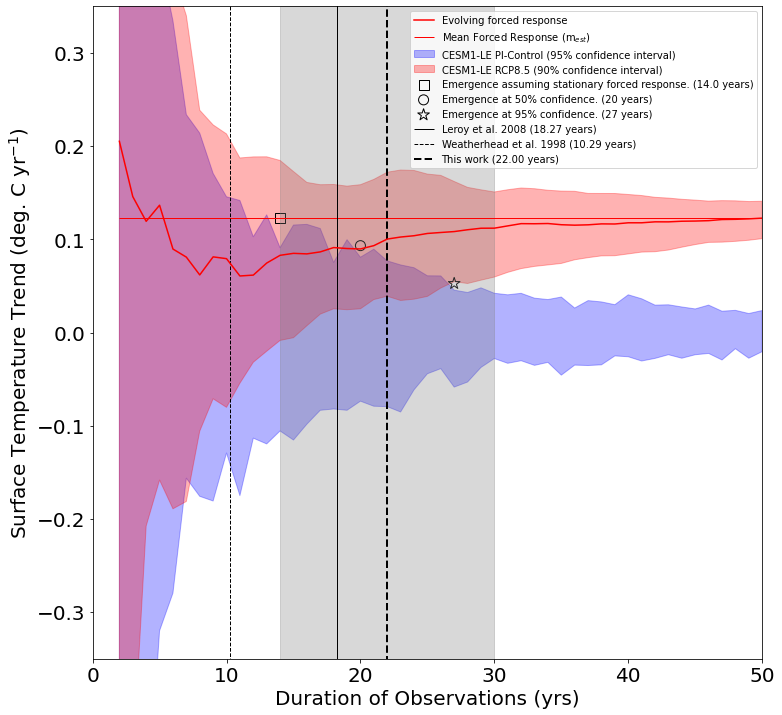

In [512]:
_var = 'TS'

ts_emergenceplot = plot_detection(_var,ens_varnames[_var],ens_varunits[_var],ylims=[-0.35,0.35])

In [513]:
def plot_detection_monthly(month,var_name,var_fullname,var_units,ylims=None,ax=None,legend=True,fontsize=20):
    '''
    Plotting function that requires the precomputed dataset objects.
    '''
    if ax:
        det_ax1 = ax
        plt.sca(ax)
        det_fig1=None
    else:
        det_fig1,det_ax1 = plt.subplots(1,1,figsize=(12,12))

    # Grab the 5th and 95 percentiles of the pre-industrial control
    _lower_bounds_pic = pic_bounds_monthly_dur_ds[var_name].sel(bound=0,month=month)
    _upper_bounds_pic = pic_bounds_monthly_dur_ds[var_name].sel(bound=1,month=month)

    # Grab the 5th and 95 percentiles of the RCP8.5-forced ensemble runs
    _lower_bounds_forced = lens_bounds_monthly_dur_ds[var_name].sel(bound=0,month=month)
    _upper_bounds_forced = lens_bounds_monthly_dur_ds[var_name].sel(bound=1,month=month)
    _mean_slopes_forced  = lens_bounds_monthly_dur_ds[var_name].sel(bound=2,month=month)
    
    det_ax1.hlines(regress_monthly[var_name].sel(degree=1,month=month),2,50,color='red',label='Mean Forced Response (m$_{est}$)',linewidth=1) # plot the mean forced response
    det_ax1.plot(durations,_mean_slopes_forced,color='red',label='Evolving forced response')

    # Plot confidence bounds on the forced and unforced slopes
    det_ax1.fill_between(x=durations,y1=_lower_bounds_pic,y2=_upper_bounds_pic,label='CESM1-LE PI-Control (95% confidence interval)',color='blue',alpha=0.3)
    det_ax1.fill_between(x=durations,y1=_lower_bounds_forced,y2=_upper_bounds_forced,label='CESM1-LE RCP8.5 (90% confidence interval)',color='red',alpha=0.3)

    # Plot markers for different types of detection
    det_ax1.scatter(emergence_naivest_monthly_ds[var_name].sel(month=month),regress_monthly[var_name].sel(degree=1,month=month),marker='s',s=100,color='None',edgecolors='black',
                    label='Emergence assuming stationary forced response. (%s years)' % int(emergence_naivest_monthly_ds[var_name].sel(month=month)))

    det_ax1.scatter(emergence_naive_monthly_ds[var_name].sel(month=month),_mean_slopes_forced[int(emergence_naive_monthly_ds[var_name].sel(month=month)-1)],
                    marker='o',s=100,color='None',edgecolors='black',
                    label='Emergence at 50%% confidence. (%s years)' % int(emergence_naive_monthly_ds[var_name].sel(month=month)))
    
    # check which side of the distributions to put the complex detection marker on
    try:
        if _lower_bounds_forced.sel(duration=int(emergence_complex_monthly_ds[var_name].sel(month=month))) > _upper_bounds_pic.sel(duration=int(emergence_complex_monthly_ds[var_name].sel(month=month))):
            det_ax1.scatter(emergence_complex_monthly_ds[var_name].sel(month=month),_lower_bounds_forced.sel(duration=int(emergence_complex_monthly_ds[var_name].sel(month=month)-1)),
                            marker='*',s=150,color='None',edgecolors='black',
                            label='Emergence at 95%% confidence. (%s years)' % int(emergence_complex_monthly_ds[var_name].sel(month=month)))
        else:
            det_ax1.scatter(emergence_complex_monthly_ds[var_name].sel(month=month),_upper_bounds_forced.sel(duration=int(emergence_complex_monthly_ds[var_name].sel(month=month)-1)),
                            marker='*',s=150,color='None',edgecolors='black',
                            label='Emergence at 95%% confidence. (%s years)' % int(emergence_complex_monthly_ds[var_name].sel(month=month)))
    except ValueError:
        det_ax1.scatter(np.nan,np.nan,marker='*',s=150,color='None',edgecolors='black',
                            label='Emergence at 95%% confidence. (>50 years)')

    det_ax1.vlines(deltaT_monthly_ds[var_name].sel(month=month),*det_ax1.get_ylim(),color='black',linewidth=1,
                   label='Leroy et al. 2008 (%.2f years)' % deltaT_monthly_ds[var_name].sel(month=month))

    det_ax1.vlines(nstar_monthly[var_name].sel(month=month),*det_ax1.get_ylim(),color='black',linewidth=1,linestyle='dashed',
                   label='Weatherhead et al. 1998 (%.2f years)' % nstar_monthly[var_name].sel(month=month))
    # Shaw time-to-detection
    det_ax1.vlines(emergence_shawT_monthly_ds[var_name].sel(month=month,bound=2),*det_ax1.get_ylim(),color='black',linewidth=2,linestyle='dashed',
                   label='This work (%.2f years)' % emergence_shawT_monthly_ds[var_name].sel(month=month,bound=2))
    # The bound here refers to the percentile of the slope, so the lower bound on emergence occurs for 95th percentile (upper bound) slopes
    _lower_shawT_detect = emergence_shawT_monthly_ds[var_name].sel(month=month,bound=1)
    _upper_shawT_detect = emergence_shawT_monthly_ds[var_name].sel(month=month,bound=0)
    if np.isnan(_upper_shawT_detect.values): # If the upper bound if above 50
        _upper_shawT_detect = 50
    det_ax1.axvspan(_lower_shawT_detect, _upper_shawT_detect, color='grey', alpha=0.3)

    det_ax1.set_xlabel('Duration of Observations (yrs)',fontsize=fontsize)
    det_ax1.set_ylabel('%s Trend (%s yr$^{-1}$)' % (var_fullname,var_units),fontsize=fontsize)

    det_ax1.set_xlim(0,50)
    
    if ylims=='full':
        ylow  = np.min(np.concatenate([_lower_bounds_pic.sel(duration=slice(10,None)),_lower_bounds_forced.sel(duration=slice(10,None))]))
        yhigh = np.max(np.concatenate([_upper_bounds_pic.sel(duration=slice(10,None)),_upper_bounds_forced.sel(duration=slice(10,None))]))
        det_ax1.set_ylim(ylow,yhigh)
    elif not type(ylims) is type(None):
        det_ax1.set_ylim(*ylims)
    else: 
        ylow  = np.min(np.concatenate([_lower_bounds_pic,_lower_bounds_forced]))
        yhigh = np.max(np.concatenate([_upper_bounds_pic,_upper_bounds_forced]))
        det_ax1.set_ylim(ylow,yhigh)
        
    if not type(legend) is type(None):
        det_ax1.legend()
    
    det_ax1.tick_params(labelsize=fontsize)
    
    return det_fig1

Create emergence plots for a single variable over all months.

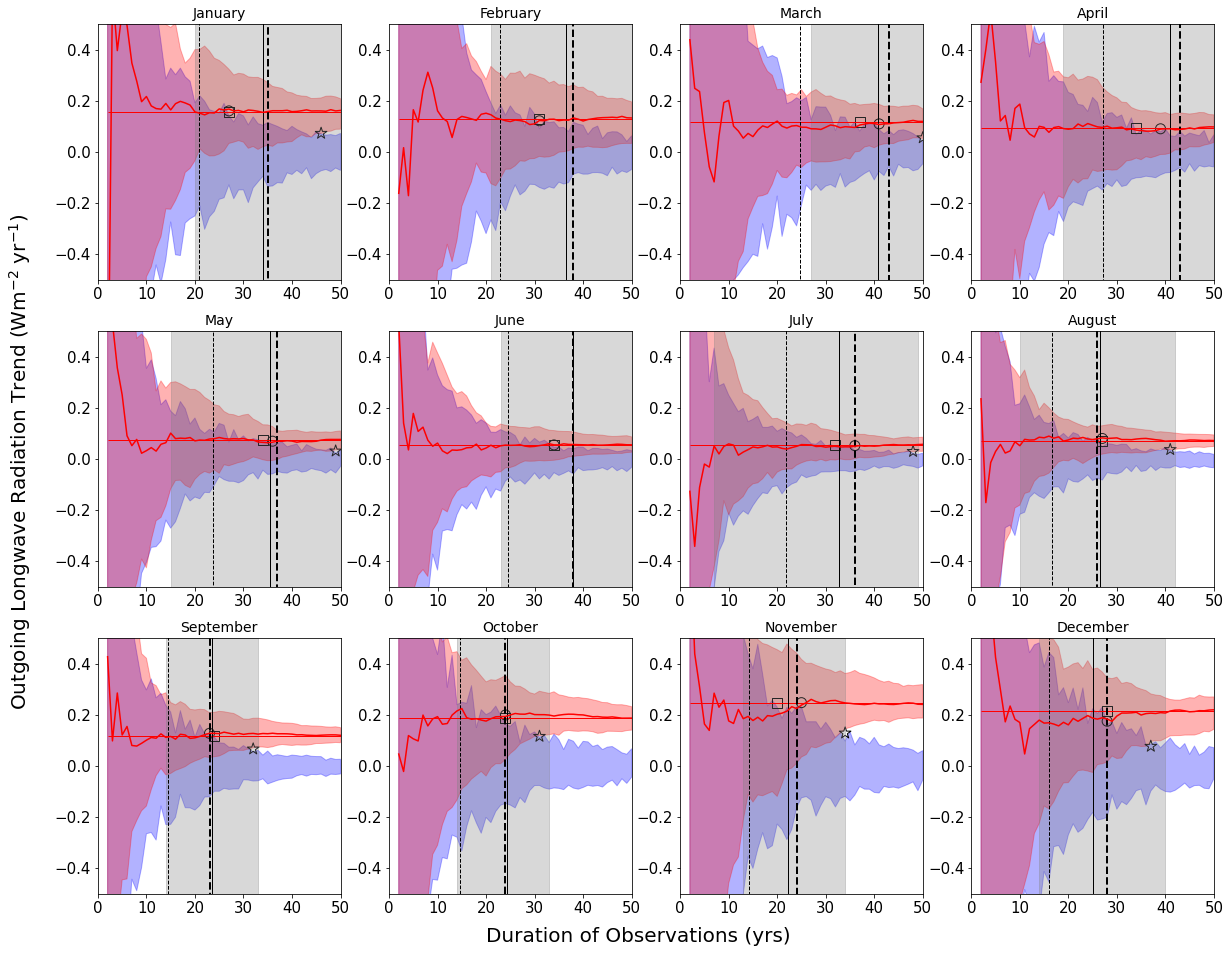

In [514]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

_fig,_axs = plt.subplots(3,4,figsize=(20,16))

_axs = _axs.flat

_var = 'FLUT'

for i,(_ax,_mon) in enumerate(zip(_axs,months)):
    flut_emergenceplot = plot_detection_monthly(i+1,_var,ens_varnames[_var],ens_varunits[_var],ylims=[-0.5,0.5],ax=_ax,legend=None,fontsize=15)

    _ax.set_ylabel('')
    _ax.set_xlabel('')
    _ax.set_title(_mon,fontsize=14)

xlabel='Duration of Observations (yrs)'
ylabel='%s Trend (%s yr$^{-1}$)' % (ens_varnames[_var],ens_varunits[_var])

_=_fig.text(0.5, 0.08, xlabel, va='bottom', ha='center',
          rotation='horizontal', rotation_mode='anchor',
          transform=_fig.transFigure, fontsize=20)

_=_fig.text(0.08, 0.5, ylabel, va='bottom', ha='center',
          rotation='vertical', rotation_mode='anchor',
          transform=_fig.transFigure, fontsize=20)

Create emergence plots over all variables for a single month (or annually).

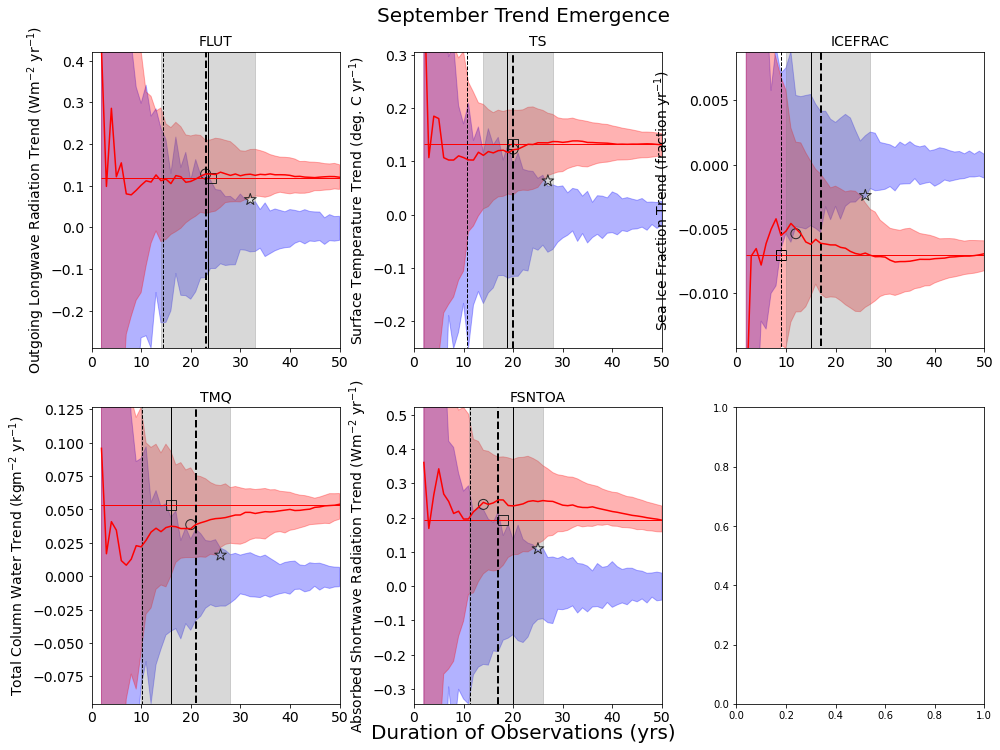

In [515]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

_fig,_axs = plt.subplots(2,3,figsize=(16,12))
_axs = _axs.flat

month = 9

for _ax,_var in zip(_axs,ens_vars):
    _emergenceplot = plot_detection_monthly(month,_var,ens_varnames[_var],ens_varunits[_var],ylims='full',ax=_ax,legend=None,fontsize=14)

    _ax.set_xlabel('')
    _ax.set_title(_var,fontsize=14)

xlabel='Duration of Observations (yrs)'
ylabel='Annual Trend (yr$^{-1}$)'
title='%s Trend Emergence' % months[month-1]

_=_fig.text(0.5, 0.08, xlabel, va='bottom', ha='center',
          rotation='horizontal', rotation_mode='anchor',
          transform=_fig.transFigure, fontsize=20)

_=_fig.text(0.5, 0.91, title, va='bottom', ha='center',
          rotation='horizontal', rotation_mode='anchor',
          transform=_fig.transFigure, fontsize=20)

_fig.subplots_adjust(wspace=0.3)

Assuming a constant forced response does not always yield a too-fast detection time, just look at FSNTOA in September. The shape of the forced response non-linearity is different, so emergence actually occurs earlier than the constant slope estimate.

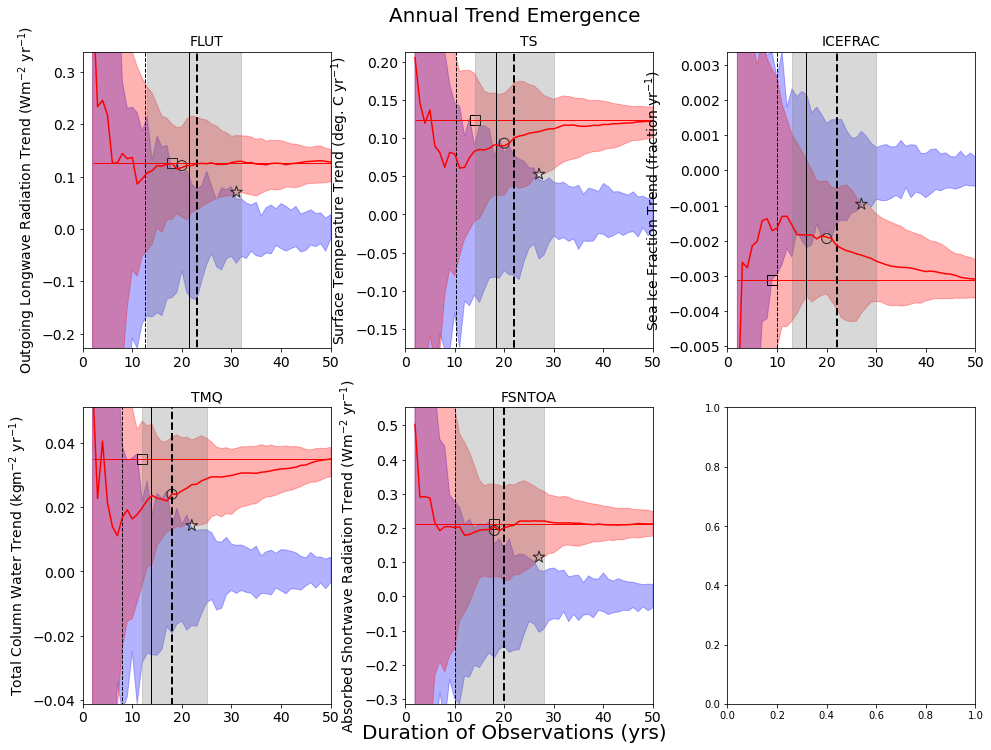

In [516]:
_fig,_axs = plt.subplots(2,3,figsize=(16,12))

_axs = _axs.flat

for _ax,_var in zip(_axs,ens_vars):
    _emergenceplot = plot_detection(_var,ens_varnames[_var],ens_varunits[_var],ylims='full',ax=_ax,legend=None,fontsize=14)

    # _ax.set_ylabel('')
    _ax.set_xlabel('')
    _ax.set_title(_var,fontsize=14)

xlabel='Duration of Observations (yrs)'
ylabel='Annual Trend (yr$^{-1}$)'
title = 'Annual Trend Emergence'

_=_fig.text(0.5, 0.08, xlabel, va='bottom', ha='center',
          rotation='horizontal', rotation_mode='anchor',
          transform=_fig.transFigure, fontsize=20)

_=_fig.text(0.5, 0.91, title, va='bottom', ha='center',
          rotation='horizontal', rotation_mode='anchor',
          transform=_fig.transFigure, fontsize=20)

_fig.subplots_adjust(wspace=0.3)

### Figure for Jen

Jonah have monthly emergence plots for TS and OLR in the spring month we’re interested in and the fall.

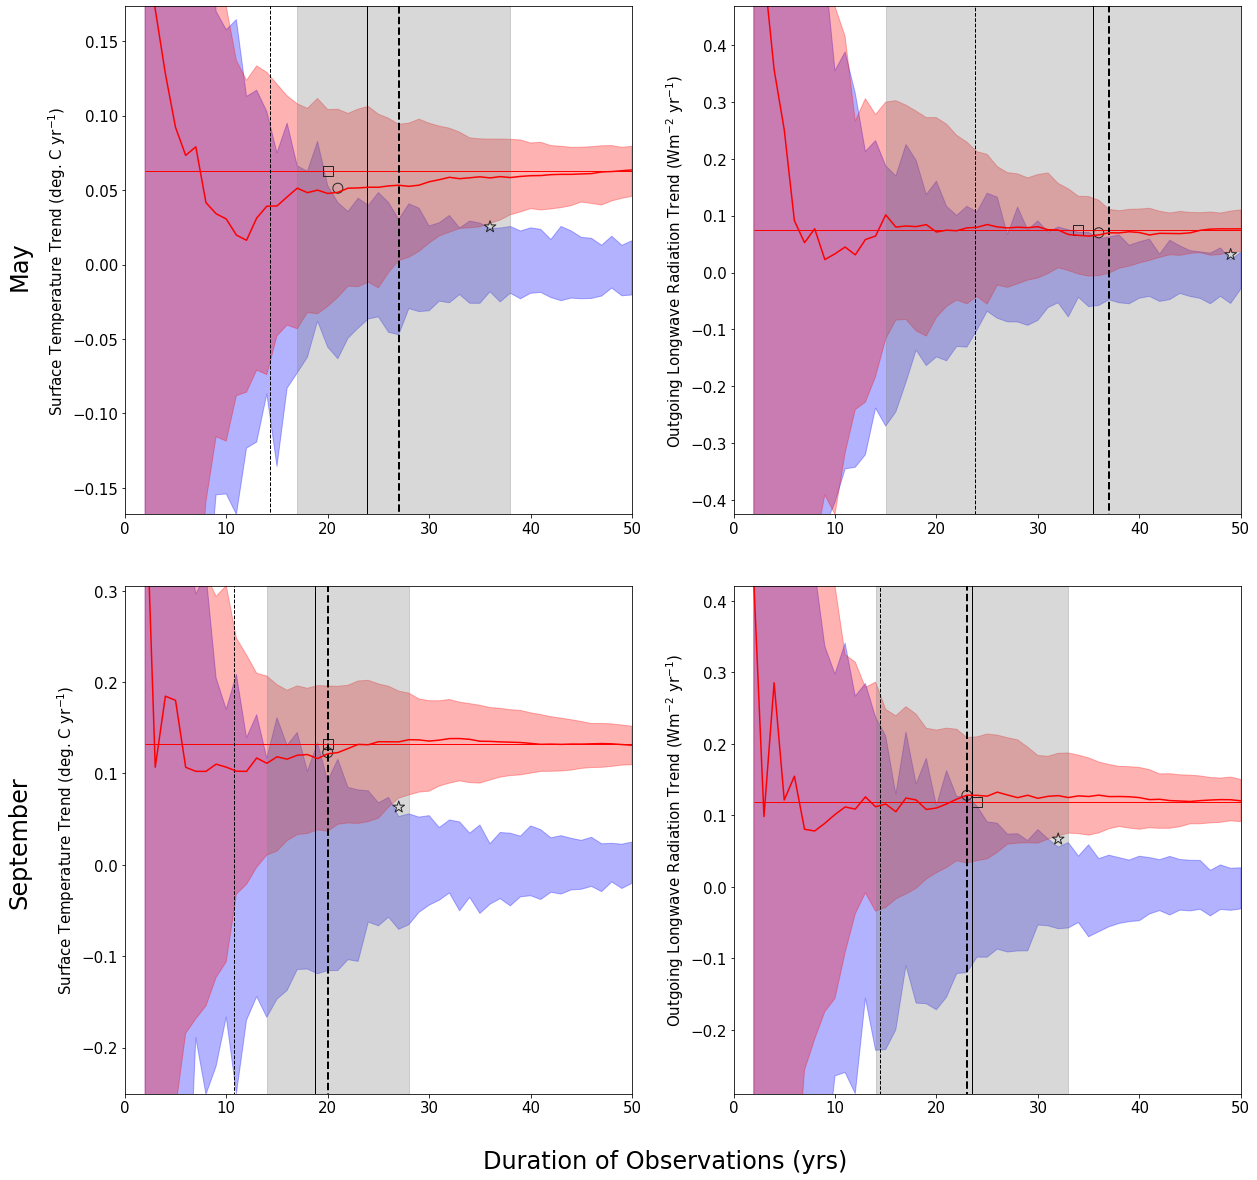

In [532]:
spring_month = 5
fall_month = 9

_fig,_axs = plt.subplots(2,2,figsize=(20,20))
_axs = _axs.flat

panel1 = plot_detection_monthly(spring_month,'TS',ens_varnames['TS'],ens_varunits['TS'],ylims='full',legend=None,fontsize=15,ax=_axs[0])
panel2 = plot_detection_monthly(spring_month,'FLUT',ens_varnames['FLUT'],ens_varunits['FLUT'],ylims='full',legend=None,fontsize=15,ax=_axs[1])

panel3 = plot_detection_monthly(fall_month,'TS',ens_varnames['TS'],ens_varunits['TS'],ylims='full',legend=None,fontsize=15,ax=_axs[2])
panel4 = plot_detection_monthly(fall_month,'FLUT',ens_varnames['FLUT'],ens_varunits['FLUT'],ylims='full',legend=None,fontsize=15,ax=_axs[3])

for _ax in _axs:
    _ax.set_xlabel('')

xlabel='Duration of Observations (yrs)'
ylabel='Annual Trend (yr$^{-1}$)'
title='%s Trend Emergence' % months[month-1]

_fig.subplots_adjust(hspace=0.14)

_=_fig.text(0.06, 0.7, 'May', va='bottom', ha='center',
          rotation='vertical', rotation_mode='anchor',
          transform=_fig.transFigure, fontsize=24)

_=_fig.text(0.06, 0.3, 'September', va='bottom', ha='center',
          rotation='vertical', rotation_mode='anchor',
          transform=_fig.transFigure, fontsize=24)

_=_fig.text(0.5, 0.07, 'Duration of Observations (yrs)', va='bottom', ha='center',
          rotation='horizontal', rotation_mode='anchor',
          transform=_fig.transFigure, fontsize=24)

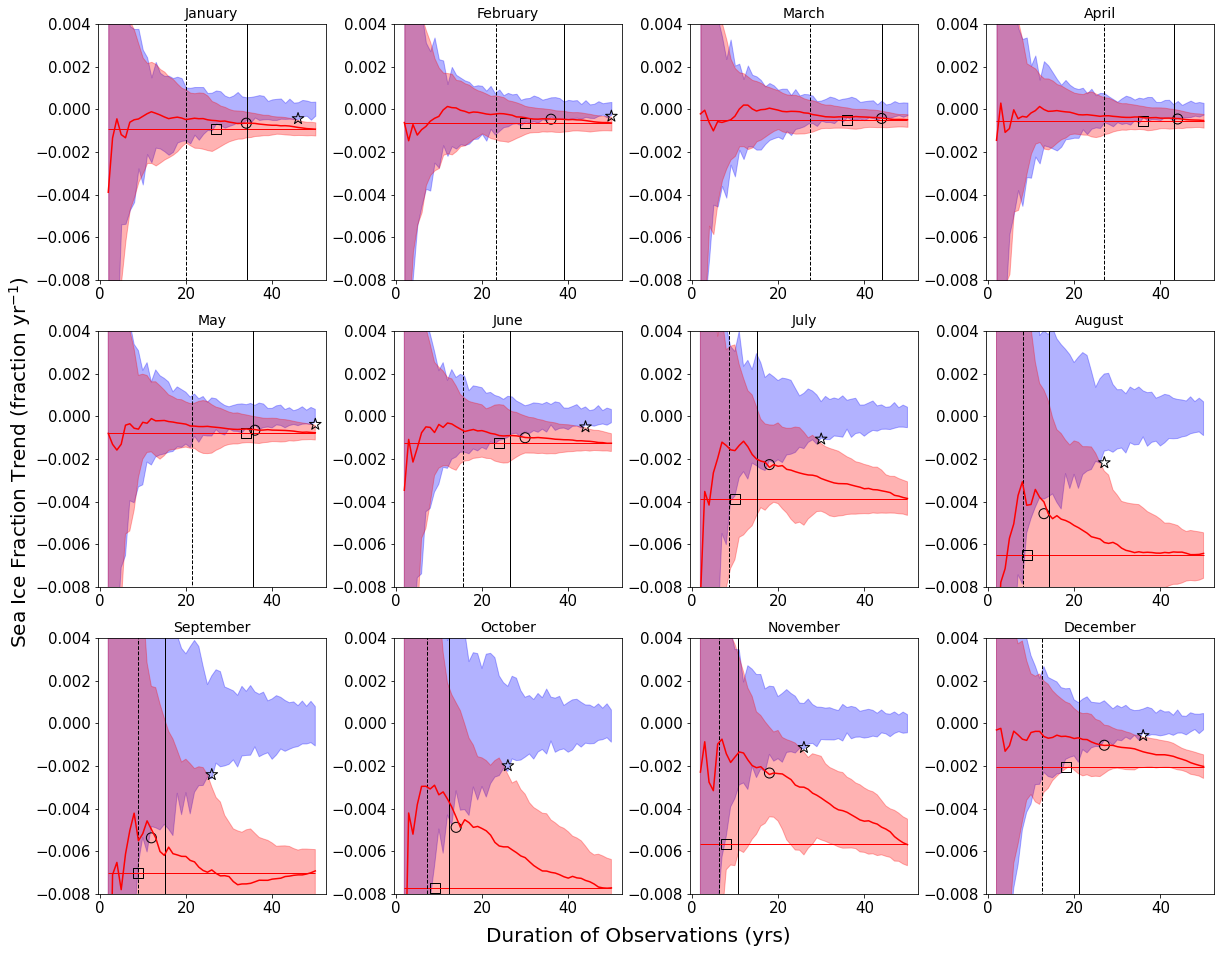

In [356]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

_fig,_axs = plt.subplots(3,4,figsize=(20,16))

_axs = _axs.flat

_var = 'ICEFRAC'

for i,(_ax,_mon) in enumerate(zip(_axs,months)):
    flut_emergenceplot = plot_detection_monthly(i+1,_var,ens_varnames[_var],ens_varunits[_var],ylims=[-0.008,0.004],ax=_ax,legend=None,fontsize=15)

    _ax.set_ylabel('')
    _ax.set_xlabel('')
    _ax.set_title(_mon,fontsize=14)

xlabel='Duration of Observations (yrs)'
ylabel='%s Trend (%s yr$^{-1}$)' % (ens_varnames[_var],ens_varunits[_var])

_=_fig.text(0.5, 0.08, xlabel, va='bottom', ha='center',
          rotation='horizontal', rotation_mode='anchor',
          transform=_fig.transFigure, fontsize=20)

_=_fig.text(0.08, 0.5, ylabel, va='bottom', ha='center',
          rotation='vertical', rotation_mode='anchor',
          transform=_fig.transFigure, fontsize=20)

_fig.subplots_adjust(wspace=0.3)

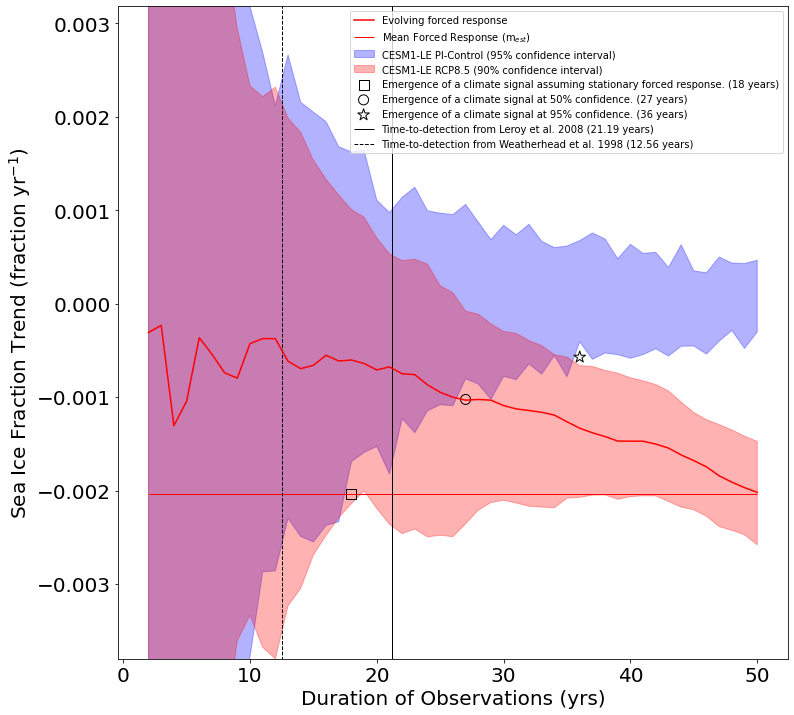

In [305]:
_var = 'ICEFRAC'

flut_emergenceplot = plot_detection_monthly(12,_var,ens_varnames[_var],ens_varunits[_var],ylims='full')

ValueError: cannot convert float NaN to integer

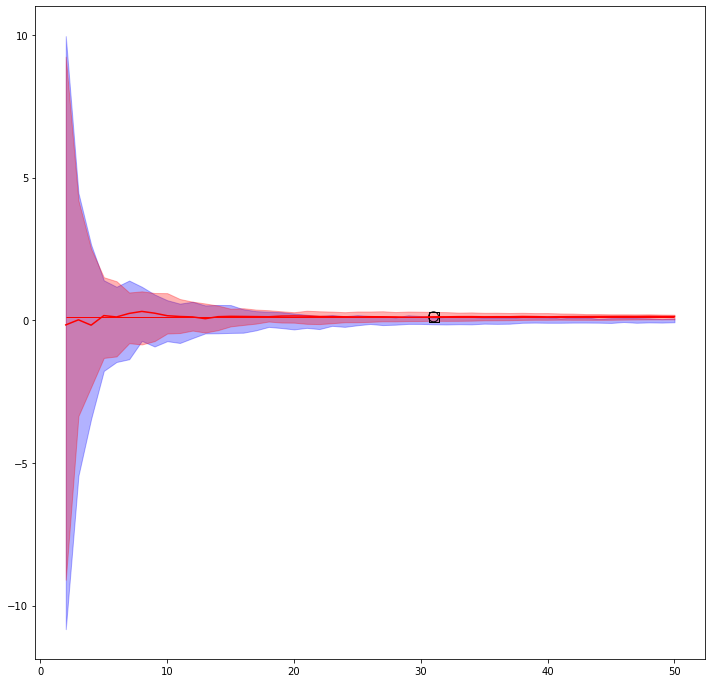

In [309]:
_var = 'FLUT'

flut_emergenceplot = plot_detection_monthly(2,_var,ens_varnames[_var],ens_varunits[_var],ylims='full')

In [36]:
# to_png(flut_emergenceplot,'OLR_emergenceplot',dpi=300)

TypeError: only size-1 arrays can be converted to Python scalars

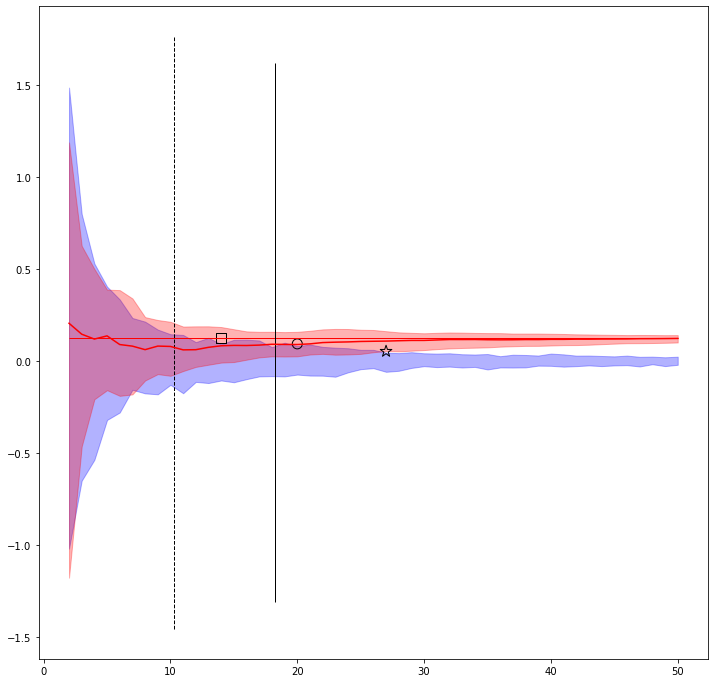

In [448]:
_var = 'TS'

ts_emergenceplot = plot_detection(_var,ens_varnames[_var],ens_varunits[_var],ylims=[-0.35,0.35])

In [38]:
# to_png(ts_emergenceplot,'TS_emergenceplot',dpi=300)